In [3]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline


In [5]:
import os
import pandas as pd

# Define the file path
file_path = "/Volumes/sanket/HR Analtics .ipynb/turnover-data-set.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found! Loading the dataset...")
    df = pd.read_csv(file_path, encoding='ISO-8859-1', index_col=None)
    print(df.head())  # Display the first few rows
else:
    print("File not found! Please check the file path.")


File found! Loading the dataset...
        stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      

This dataset contains employee turnover information with 1,129 records and 16 columns including:

Numerical variables:

'stag' (tenure/length of service)
'event' (likely turnover event indicator)
'age'
Personality metrics: 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator'
Categorical variables:

'gender'
'industry'
'profession'
'traffic' (appears to be traffic source/recruitment channel)
'coach' (yes/no)
'head_gender' (manager's gender)
'greywage' (salary type)
'way' (transportation method)
Above are a sample of the first few rows

Step 1: Exploratory Data Analysis (EDA)

In [37]:
# Checking the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (1129, 16)


In [38]:
# Checking the data types of each column
print(df.dtypes)

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object


In [39]:
# Checking to see if there are any missing values in our data set
df.isnull().any()

stag            False
event           False
gender          False
age             False
industry        False
profession      False
traffic         False
coach           False
head_gender     False
greywage        False
way             False
extraversion    False
independ        False
selfcontrol     False
anxiety         False
novator         False
dtype: bool

Step 2: Data Preprocessing

In [40]:
# Checking for remaining missing values
print(df.isnull().sum())

# Summary of the dataset
print(df.describe())


stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64
              stag        event          age  extraversion     independ  \
count  1129.000000  1129.000000  1129.000000   1129.000000  1129.000000   
mean     36.627526     0.505757    31.066965      5.592383     5.478034   
std      34.096597     0.500188     6.996147      1.851637     1.703312   
min       0.394251     0.000000    18.000000      1.000000     1.000000   
25%      11.728953     0.000000    26.000000      4.600000     4.100000   
50%      24.344969     1.000000    30.000000      5.400000     5.500000   
75%      51.318275     1.000000    36.000000      7.000000     6.900000   
max     179.449692     1.000000    58.000000     10.000000    10.000000   

       selfcontrol     

In [43]:
# Rename columns 
df.columns = ['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']

# Handle missing values 
df.ffill(inplace=True)  

Step 3: Survival Analysis

1. Kaplan-Meier Estimator:
Use the Kaplan-Meier estimator to visualize survival functions.

In [46]:
# Checking the columns in the DataFrame
print(df.columns)

# Create 'duration' and 'event_observerd'
if 'duration' not in df.columns:
    df['duration'] = df['stag']  

if 'event_observed' not in df.columns:
    df['event_observed'] = df['event'] 

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator'],
      dtype='object')



2.Cox Proportional Hazards Model:
To explore the impact of various features on employee turnover, you can use the Cox model

Basic statistics for numerical features:
               age  extraversion     independ  selfcontrol      anxiety  \
count  1116.000000   1116.000000  1116.000000  1116.000000  1116.000000   
mean     31.024734      5.589606     5.474462     5.607527     5.666667   
std       6.973078      1.857401     1.702149     1.985720     1.711035   
min      18.000000      1.000000     1.000000     1.000000     1.700000   
25%      26.000000      4.600000     4.100000     4.100000     4.800000   
50%      30.000000      5.400000     5.500000     5.700000     5.600000   
75%      36.000000      7.000000     6.900000     7.200000     7.100000   
max      58.000000     10.000000    10.000000    10.000000    10.000000   

           novator  
count  1116.000000  
mean      5.877330  
std       1.903534  
min       1.000000  
25%       4.400000  
50%       6.000000  
75%       7.500000  
max      10.000000  


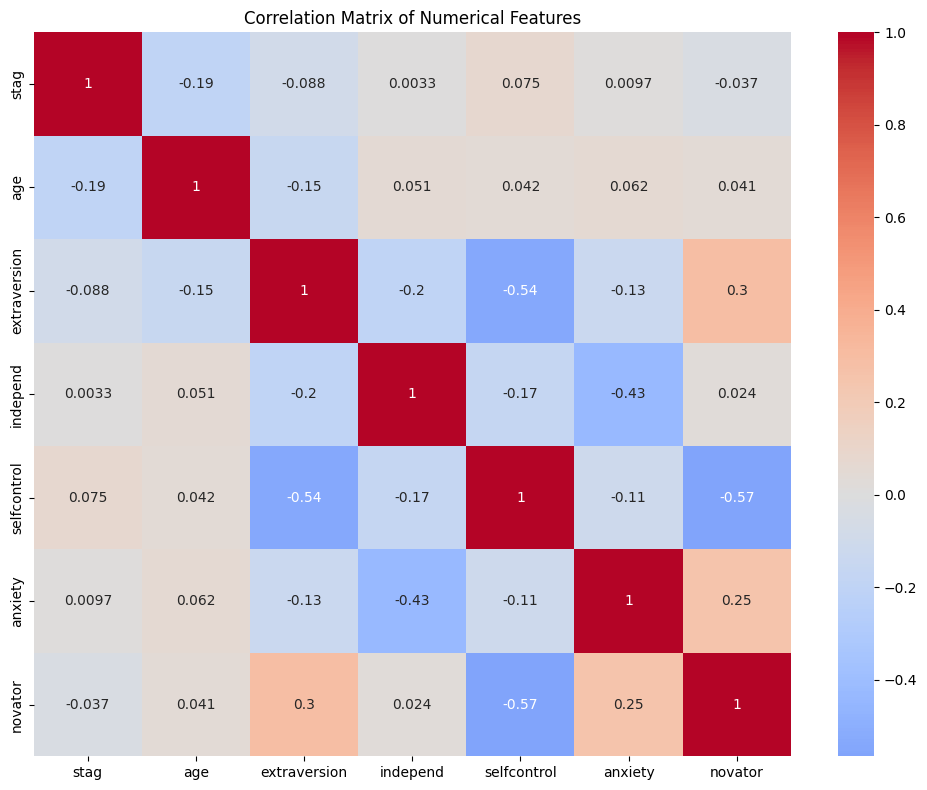

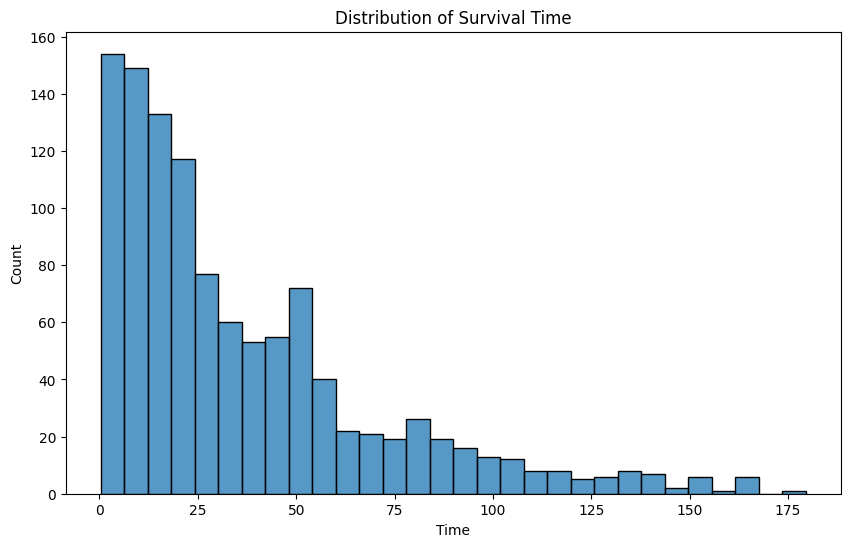

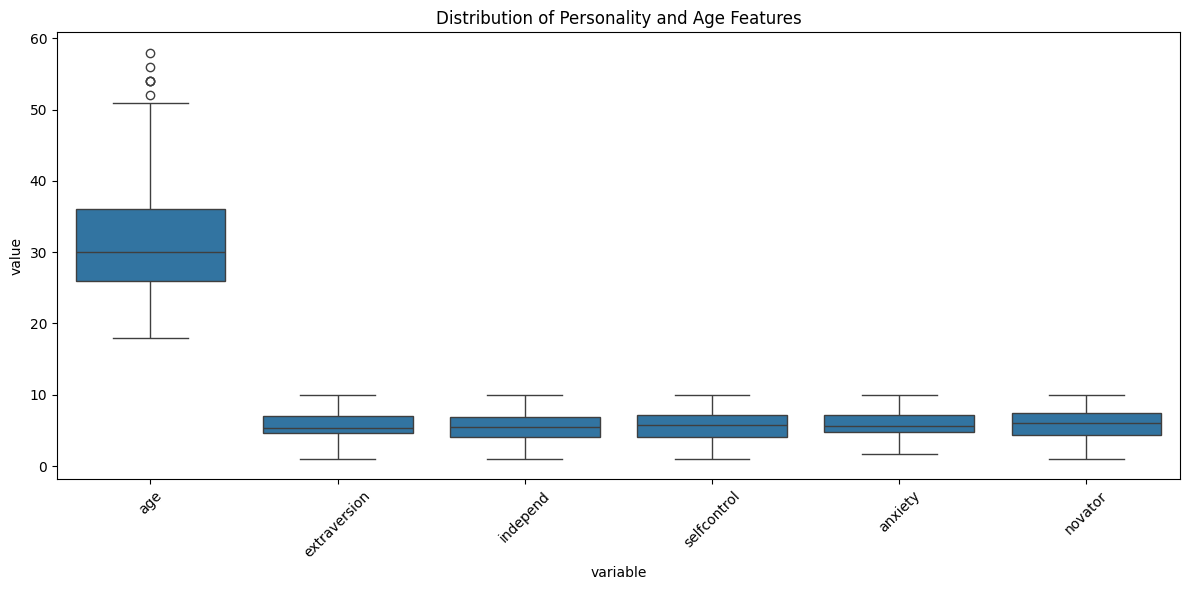

In [13]:
# Basic survival analysis
import seaborn as sns

# Calculate basic statistics for numerical columns
numerical_stats = df[['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']].describe()
print("Basic statistics for numerical features:")
print(numerical_stats)

# Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Distribution of survival time (stag)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='stag', bins=30)
plt.title('Distribution of Survival Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

# Box plots for key numerical features
plt.figure(figsize=(12, 6))
df_melted = df[['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']].melt()
sns.boxplot(data=df_melted, x='variable', y='value')
plt.title('Distribution of Personality and Age Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key observations:

The average age of employees is around 31 years, ranging from 18 to 58
Personality traits (extraversion, independence, self-control, anxiety, and novator) are measured on a 1-10 scale
Most personality traits show moderate values around 5-6 on average
The survival time distribution shows some right-skewing, indicating that while most turnover happens relatively early, there are some cases of longer tenure

In [48]:
print(df.columns)


Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator', 'duration', 'event_observed'],
      dtype='object')


In [51]:
# Check the current columns in the DataFrame
print(df.columns)

# Renamed columns 
df.columns = ['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'duration', 'event_observed']  # Add missing names

# Handle missing values 
df.ffill(inplace=True) 

Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator', 'duration', 'event_observed'],
      dtype='object')


Data Integrity Check

In [52]:
# Check for missing values
print(df.isnull().sum())

# Display basic statistics
print(df.describe())

stag              0
event             0
gender            0
age               0
industry          0
profession        0
traffic           0
coach             0
head_gender       0
greywage          0
way               0
extraversion      0
independ          0
selfcontrol       0
anxiety           0
novator           0
duration          0
event_observed    0
dtype: int64
              stag        event          age  extraversion     independ  \
count  1129.000000  1129.000000  1129.000000   1129.000000  1129.000000   
mean     36.627526     0.505757    31.066965      5.592383     5.478034   
std      34.096597     0.500188     6.996147      1.851637     1.703312   
min       0.394251     0.000000    18.000000      1.000000     1.000000   
25%      11.728953     0.000000    26.000000      4.600000     4.100000   
50%      24.344969     1.000000    30.000000      5.400000     5.500000   
75%      51.318275     1.000000    36.000000      7.000000     6.900000   
max     179.449692     1.00

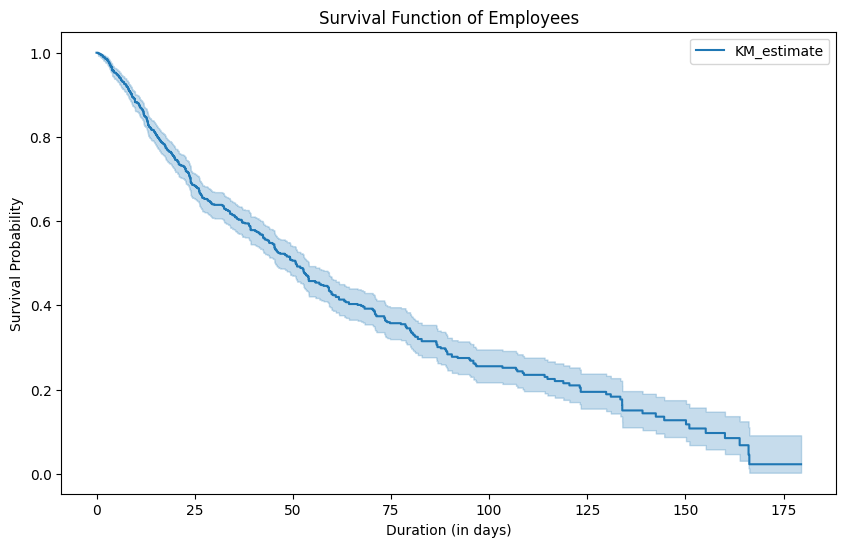

<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'duration'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3456.85
         time fit was run = 2024-12-21 10:57:42 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
age            0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
extraversion   0.04       1.04       0.03            -0.03             0.10                 0.97                 1.11
independ      -0.01       0.99       0.03            -0.07             0.06                 0.93                 1.06
selfcontrol   -0.05       0.95       0.03            -0.12             0.01                 0.89                 1.01
anxiety       -0.05       0.95       0.03            -0.11             0.01                 0.90                 1.01
novator       -0.02       0.98       0.03            -0.07             0.04                 0.93                 1.04

               cmp to     z      p   -log2(p)
covariate                                    
age              0.00  3.93 <0.005      13.50
extraversion     0.00  1.12   0.26       1.93
independ         0.00 -0.18   0.85       0.23
selfcontrol      0.00 -1.53   0.13       3.00
anxiety          0.00 -1.51   0.13       2.93
novator          0.00 -0.57   0.57       0.82
---
Concordance = 0.57
Partial AIC = 6925.71
log-likelihood ratio test = 26.90 on 6 df
-log2(p) of ll-ratio test = 12.69

In [54]:
from lifelines import KaplanMeierFitter, CoxPHFitter

# Kaplan-Meier Estimator
kmf = KaplanMeierFitter()
kmf.fit(durations=df['duration'], event_observed=df['event_observed'])

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival Function of Employees')
plt.xlabel('Duration (in days)')
plt.ylabel('Survival Probability')
plt.show()

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df[['duration', 'event_observed', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']], duration_col='duration', event_col='event_observed')
cph.print_summary()  # Display the summary of the model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare data for regression
X = df[['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']]
y = df['event_observed']  # Assuming this is the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       108
           1       0.56      0.55      0.56       118

    accuracy                           0.54       226
   macro avg       0.54      0.54      0.54       226
weighted avg       0.54      0.54      0.54       226



Classification Algorithm

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61       108
           1       0.64      0.61      0.63       118

    accuracy                           0.62       226
   macro avg       0.62      0.62      0.62       226
weighted avg       0.62      0.62      0.62       226



Feature Importance Analysis:

Feature ranking:
1. age (0.2589678922357691)
2. novator (0.15569982341722213)
3. extraversion (0.15228315097277387)
4. selfcontrol (0.1497240108839804)
5. independ (0.1484398009465644)
6. anxiety (0.13488532154369018)


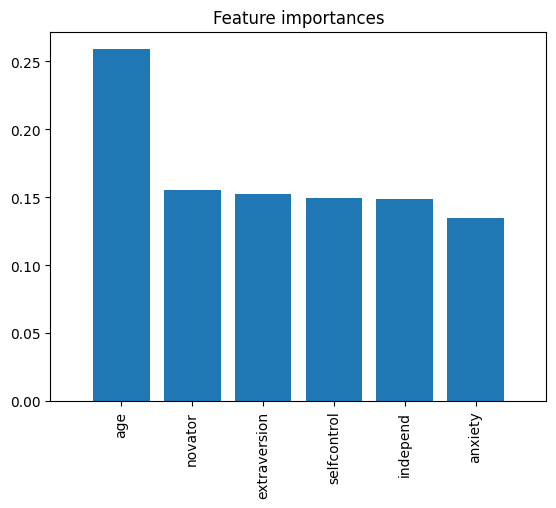

In [57]:
   # Feature importance for Random Forest
   importances = rf.feature_importances_
   feature_names = X.columns
   indices = np.argsort(importances)[::-1]

   # Print the feature ranking
   print("Feature ranking:")
   for f in range(X.shape[1]):
       print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]})")

   # Plot the feature importances
   plt.figure()
   plt.title("Feature importances")
   plt.bar(range(X.shape[1]), importances[indices], align="center")
   plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
   plt.xlim([-1, X.shape[1]])
   plt.show()

Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt'],  # Removed 'auto'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_

In [64]:
   from sklearn.ensemble import RandomForestClassifier

   # Initialize the Random Forest model with the best parameters
   best_rf = RandomForestClassifier(
       max_depth=10,
       max_features='sqrt',
       min_samples_leaf=4,
       min_samples_split=2,
       n_estimators=50,
       random_state=42
   )

   # Fit the model on the training data
   best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)

In [65]:
   from sklearn.metrics import classification_report, confusion_matrix

   # Make predictions on the test set
   y_pred = best_rf.predict(X_test)

   # Print classification report
   print(classification_report(y_test, y_pred))

   # Print confusion matrix
   print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       108
           1       0.61      0.64      0.62       118

    accuracy                           0.60       226
   macro avg       0.60      0.60      0.60       226
weighted avg       0.60      0.60      0.60       226

[[60 48]
 [43 75]]


Cross-Validation:

In [62]:
   from sklearn.model_selection import cross_val_score

   scores = cross_val_score(rf, X, y, cv=5)
   print("Cross-validation scores: ", scores)
   print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.57079646 0.5840708  0.53982301 0.49115044 0.53777778]
Mean cross-validation score:  0.5447236971484759


Predicting Specific Employees

In [60]:
   # Example employee data
   new_employees = pd.DataFrame({
       'age': [30, 40, 25],
       'extraversion': [5, 6, 7],
       'independ': [5, 4, 6],
       'selfcontrol': [6, 5, 7],
       'anxiety': [4, 3, 5],
       'novator': [6, 5, 7]
   })

   predictions = rf.predict(new_employees)
   print("Predictions for new employees: ", predictions)

Predictions for new employees:  [1 0 1]


Histograms or box plots for age, extraversion, anxiety, etc

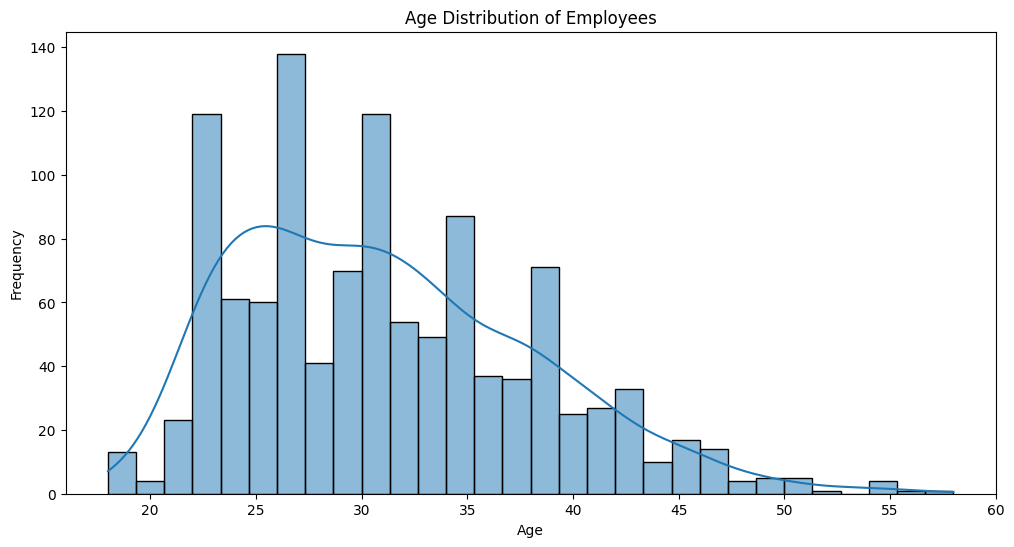

In [67]:
   plt.figure(figsize=(12, 6))
   sns.histplot(df['age'], bins=30, kde=True)
   plt.title('Age Distribution of Employees')
   plt.xlabel('Age')
   plt.ylabel('Frequency')
   plt.show()

Correlation Heatmap:
Visualize correlations between features to identify relationships

In [73]:
# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']


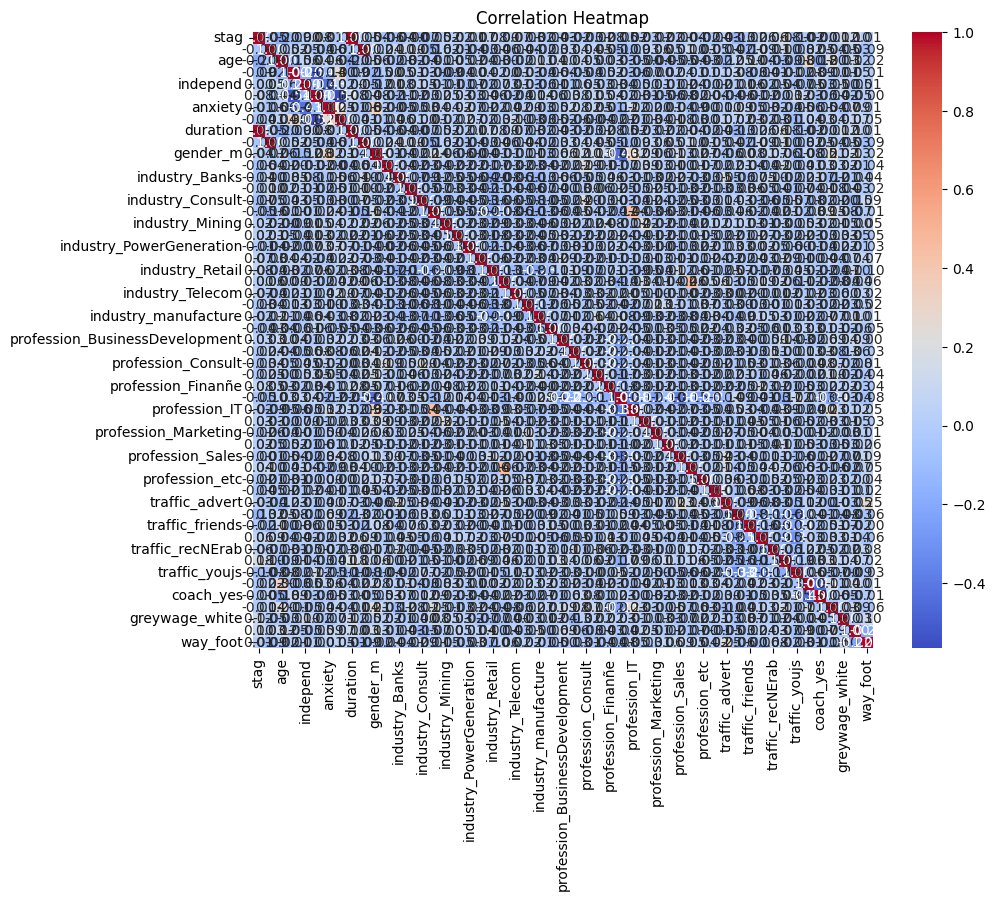

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Survival Function Plot:
Plot the survival function from the Kaplan-Meier estimator

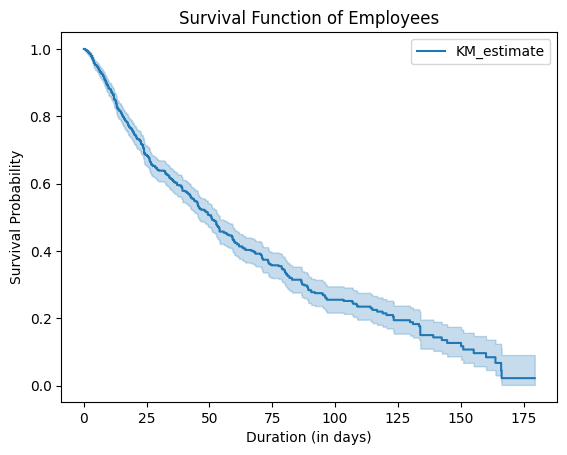

In [76]:
   kmf.plot_survival_function()
   plt.title('Survival Function of Employees')
   plt.xlabel('Duration (in days)')
   plt.ylabel('Survival Probability')
   plt.show()

Feature Importance Bar Chart:
Visualize the importance of features in the Random Forest model.

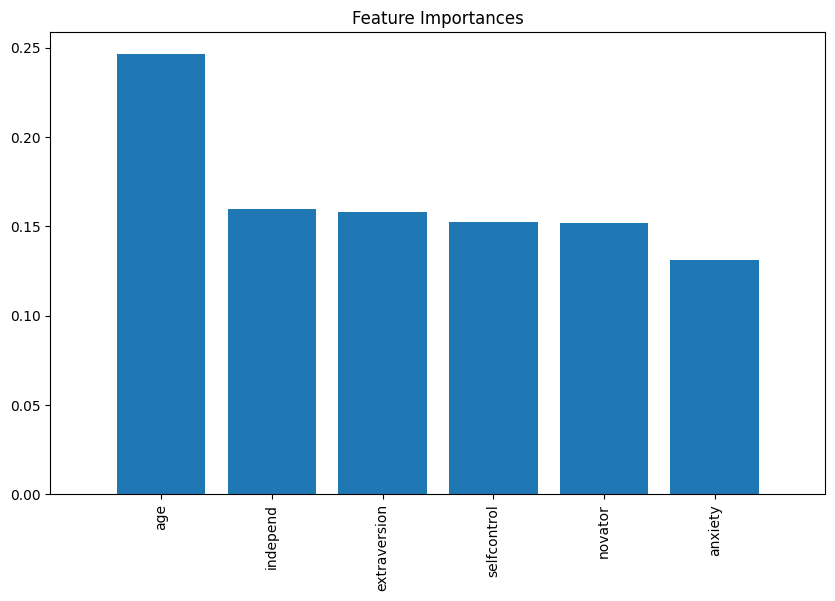

In [77]:
   importances = best_rf.feature_importances_
   feature_names = X.columns
   indices = np.argsort(importances)[::-1]

   plt.figure(figsize=(10, 6))
   plt.title("Feature Importances")
   plt.bar(range(X.shape[1]), importances[indices], align="center")
   plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
   plt.xlim([-1, X.shape[1]])
   plt.show()

Confusion Matrix:
Visualize the confusion matrix to assess model performance

[[60 48]
 [43 75]]


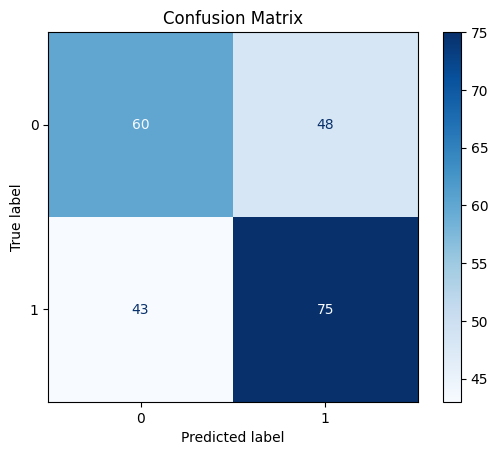

In [82]:
from sklearn.metrics import confusion_matrix

   # Make predictions on the test set
y_pred = best_rf.predict(X_test)

   # Print confusion matrix
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

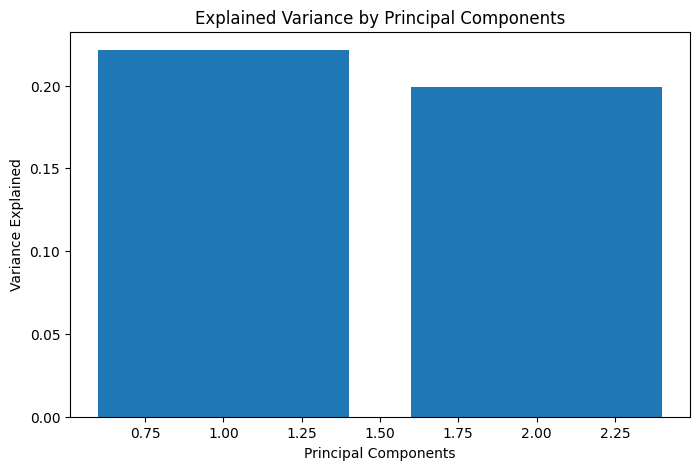

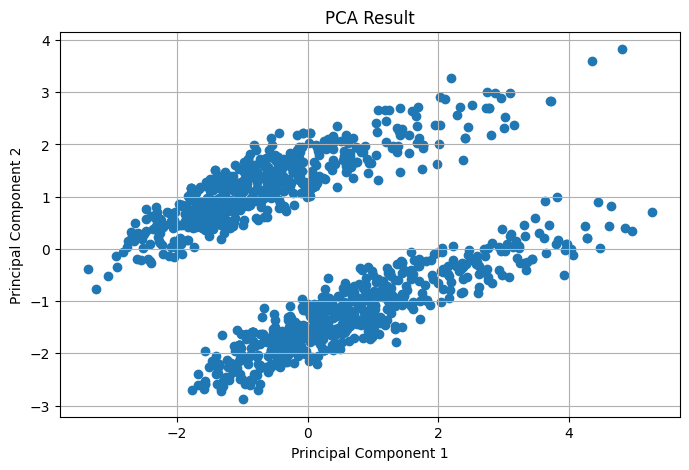

In [83]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical features (adjust as necessary)
numerical_features = df.select_dtypes(include=[np.number])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Change n_components as needed
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 4: Visualize the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

# Step 5:Visualize the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid()
plt.show()

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from datetime import datetime

# Load the dataset 
file_path = 'turnover-data-set.csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Using ISO-8859-1 to handle non-UTF-8 characters
except UnicodeDecodeError as e:
    print(f"Encoding error: {e}")
    raise

# 1. Seniority Level
def categorize_seniority(age):
    """Categorize employees based on age into seniority levels."""
    if age < 30:
        return 'Junior'
    elif 30 <= age <= 45:
        return 'Mid'
    else:
        return 'Senior'

df['seniority_level'] = df['age'].apply(categorize_seniority)

# 2. Travel Efficiency
def travel_efficiency(row):
    """Calculate travel efficiency based on traffic and transport mode."""
    if row['traffic'] == 'yes':
        if row['way'] == 'car':
            return 3
        elif row['way'] == 'bus':
            return 2
    else:
        if row['way'] == 'car':
            return 1
        elif row['way'] == 'bus':
            return 1
    return 0  # Default case

df['travel_efficiency'] = df.apply(travel_efficiency, axis=1)

# 3. Personality Clusters
# Select the Big Five traits for clustering
big_five_traits = ['extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
if all(trait in df.columns for trait in big_five_traits):
    scaler = StandardScaler()
    big_five_scaled = scaler.fit_transform(df[big_five_traits])

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Set a random state for reproducibility
    df['personality_cluster'] = kmeans.fit_predict(big_five_scaled)
else:
    print("Missing columns for personality clustering. Skipping this step.")

# 4. Retention Duration
# Handle missing or non-standard join dates
if 'join_date' in df.columns:
    df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')  # Convert to datetime, handle errors
else:
    df['join_date'] = pd.to_datetime('2020-01-01')  # Default join date for demonstration

# Calculate retention duration in years
df['retention_duration'] = (datetime.now() - df['join_date']).dt.days // 365  # Convert days to years

# Save the updated DataFrame
output_file_path = 'updated_turnover_data_set.csv'
df.to_csv(output_file_path, index=False)
print(f"Updated dataset saved to {output_file_path}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Updated dataset saved to updated_turnover_data_set.csv


1. Personality and Performance Insights
Analysis of Personality Traits Correlating with Retention and Performance
We will analyze how the Big Five personality traits (extraversion, independ, selfcontrol, anxiety, novator) correlate with retention (event) and performance (stag). We can use correlation coefficients and visualizations like scatter plots and heatmaps.

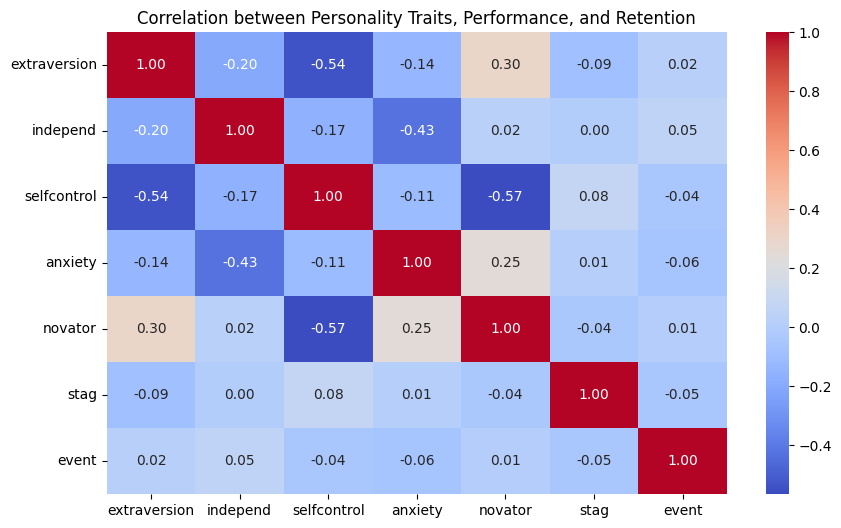

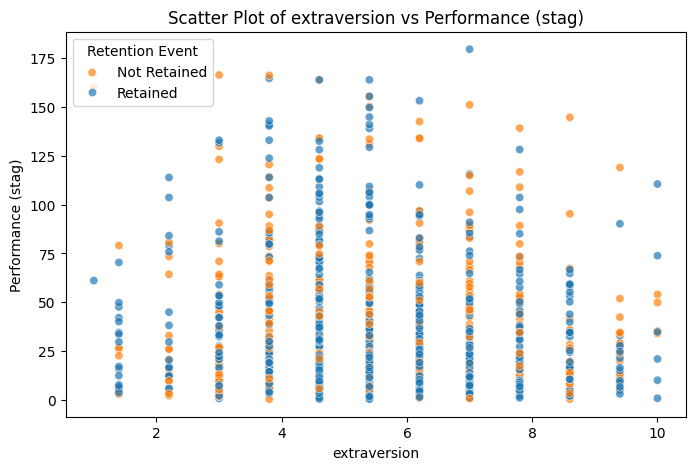

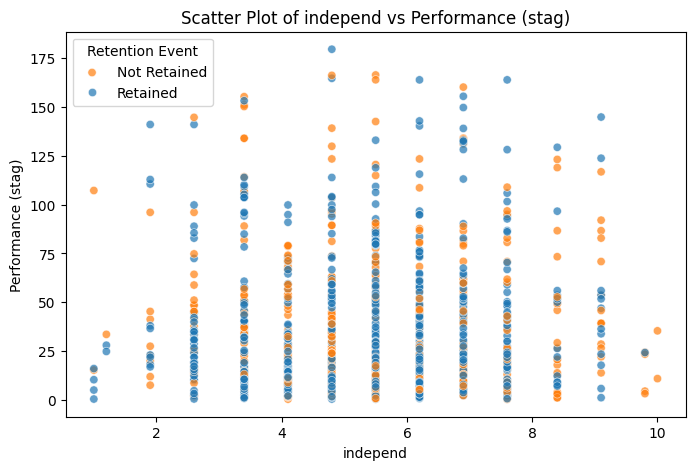

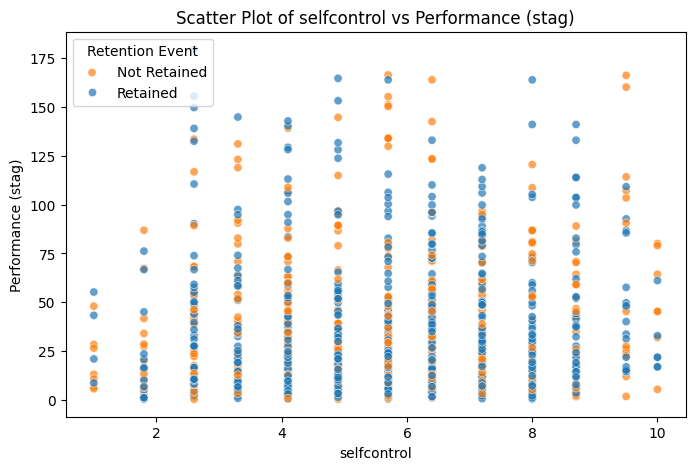

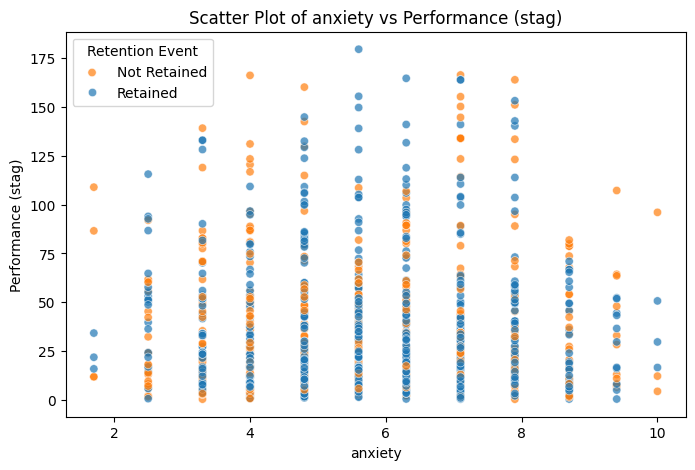

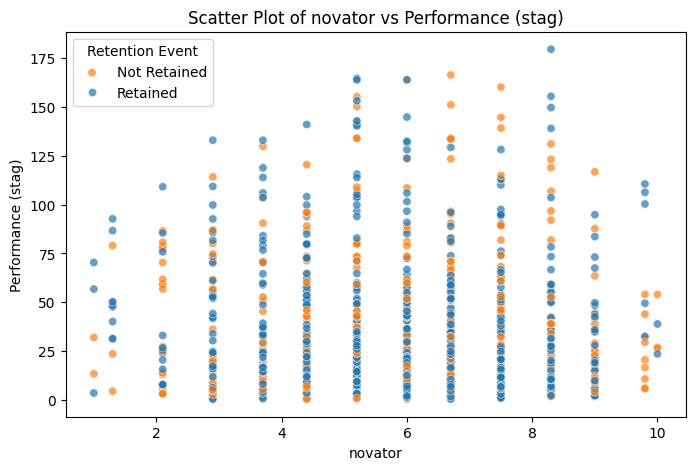

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated dataset
df = pd.read_csv('updated_turnover_data_set.csv')

# Calculate correlation matrix
correlation_matrix = df[['extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'stag', 'event']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Personality Traits, Performance, and Retention")
plt.show()

# Scatter plots for individual traits against performance
traits = ['extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
for trait in traits:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=trait, y='stag', hue='event', alpha=0.7)
    plt.title(f'Scatter Plot of {trait} vs Performance (stag)')
    plt.xlabel(trait)
    plt.ylabel('Performance (stag)')
    plt.legend(title='Retention Event', loc='upper left', labels=['Not Retained', 'Retained'])
    plt.show()


2. Department/Team Retention Analysis
We will analyze retention rates across different departments or teams. We can use bar charts or pie charts to visualize the retention rates.

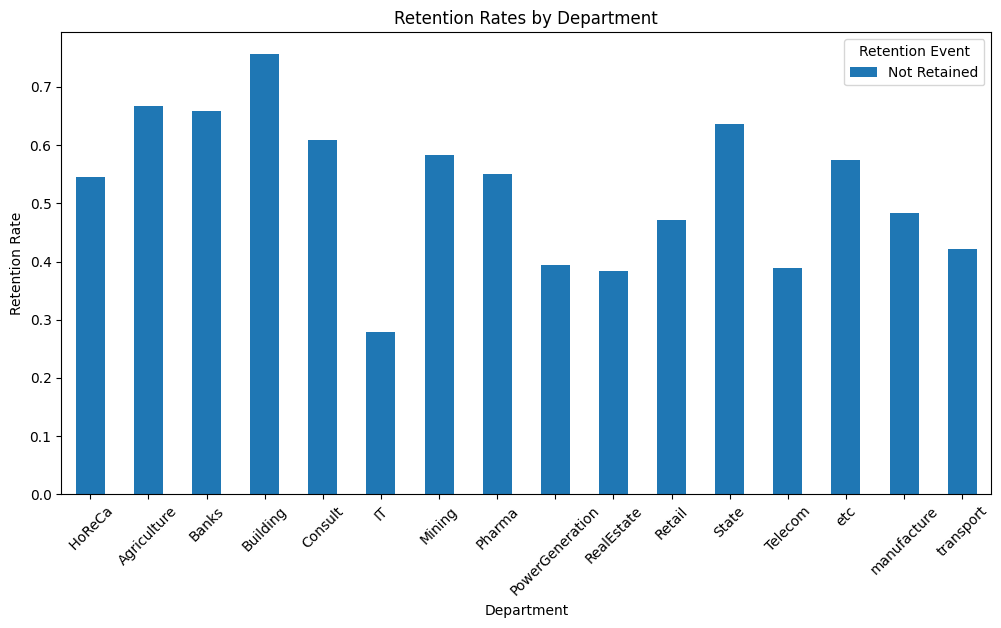

In [87]:
# Calculate retention rates by department
department_retention = df.groupby(['industry', 'event']).size().unstack(fill_value=0)
department_retention['Retention Rate'] = department_retention[1] / (department_retention[0] + department_retention[1])

# Create a stacked bar chart
department_retention[['Retention Rate']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Retention Rates by Department')
plt.xlabel('Department')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.legend(title='Retention Event', labels=['Not Retained', 'Retained'])
plt.show()

3. Impact of Hiring Sources
Analyze Retention Rates by Hiring Sources
We will analyze how different hiring sources influence retention rates and create visuals to compare these rates.

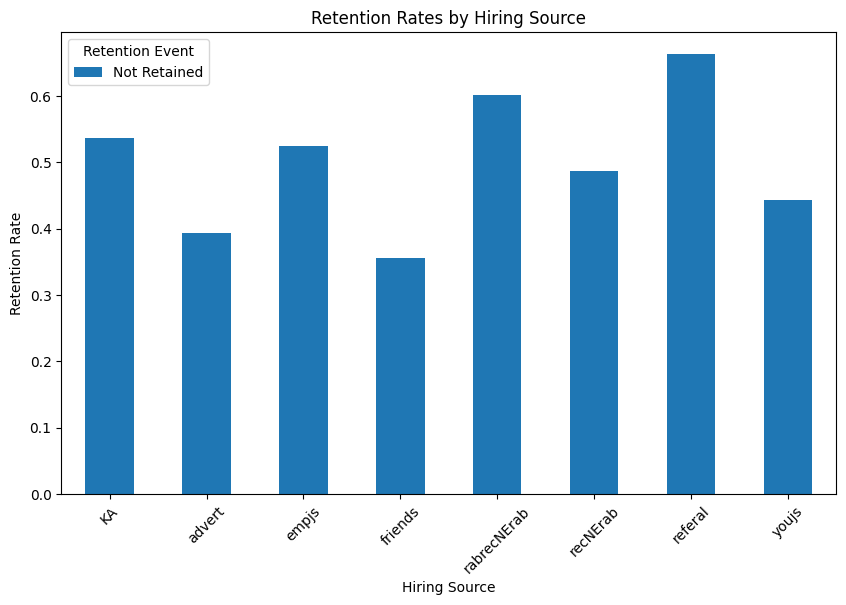

In [88]:
# Assuming 'traffic' column represents hiring sources
hiring_source_retention = df.groupby(['traffic', 'event']).size().unstack(fill_value=0)
hiring_source_retention['Retention Rate'] = hiring_source_retention[1] / (hiring_source_retention[0] + hiring_source_retention[1])

# Create a bar chart for hiring sources
hiring_source_retention[['Retention Rate']].plot(kind='bar', figsize=(10, 6))
plt.title('Retention Rates by Hiring Source')
plt.xlabel('Hiring Source')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.legend(title='Retention Event', labels=['Not Retained', 'Retained'])
plt.show()

In [92]:
print(df[['stag', 'event']].head())

        stag  event
0   7.030801      1
1  22.965092      1
2  15.934292      1
3  15.934292      1
4   8.410678      1


In [93]:
print(df['profession'].unique())


['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting']


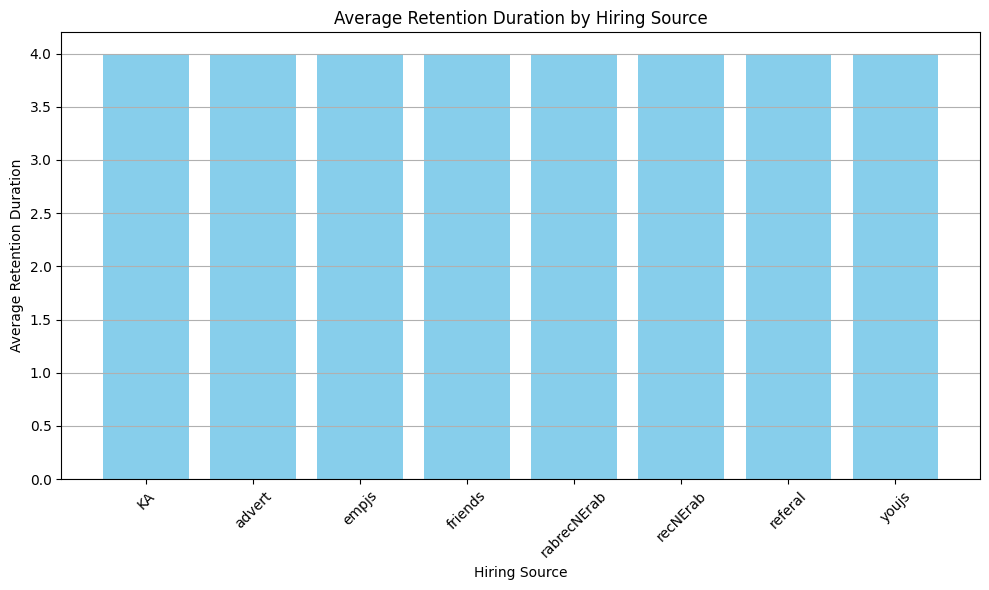

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('updated_turnover_data_set.csv')

# Group by hiring source and calculate average retention duration
retention_analysis = data.groupby('traffic')['retention_duration'].mean().reset_index()

# Sort values for better visualization
retention_analysis = retention_analysis.sort_values(by='retention_duration', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(retention_analysis['traffic'], retention_analysis['retention_duration'], color='skyblue')
plt.title('Average Retention Duration by Hiring Source')
plt.xlabel('Hiring Source')
plt.ylabel('Average Retention Duration')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [97]:
import pandas as pd

# Load the dataset
data = pd.read_csv('updated_turnover_data_set.csv')

# Get unique hiring sources
unique_hiring_sources = data['traffic'].unique()

# Print the unique hiring sources
print("Unique Hiring Sources:")
for source in unique_hiring_sources:
    print(source)

Unique Hiring Sources:
rabrecNErab
empjs
youjs
referal
advert
KA
recNErab
friends


In [102]:
import pandas as pd

# Load the dataset
df = pd.read_csv('updated_turnover_data_set.csv')

# Define replacements for standardization
replacements = {
    'empjs': 'Employee Job Search',
    'youjs': 'Youth Job Search',
    'referal': 'Referral',
    'friends': 'Friend Referral',
    'advert': 'Advertisement',
    'KA': 'Key Account',
    'rabrecNErab': 'External Recruitment',
    'recNErab': 'Non-standard Recruitment'  
}

# Replace values in the traffic column
df['traffic'] = df['traffic'].replace(replacements)

# Group similar categories 
grouped_replacements = {
    'Employee Job Search': 'Job Search',
    'Youth Job Search': 'Job Search',
    'Referral': 'Referral',
    'Friend Referral': 'Referral',
    'Advertisement': 'Advertisement',
    'Key Account': 'Key Account',
    'External Recruitment': 'External Recruitment',
    'Non-standard Recruitment': 'Non-standard Recruitment'
}

df['traffic'] = df['traffic'].replace(grouped_replacements)


print(df['traffic'].value_counts())



traffic
Job Search                  566
Referral                    213
External Recruitment        211
Key Account                  67
Non-standard Recruitment     39
Advertisement                33
Name: count, dtype: int64


In [104]:
# checking the column containing department 
if 'profession' in df.columns:  
    all_departments = df['profession'].dropna().unique()  
    all_departments = sorted(all_departments)  

    print("Departments in the dataset:")
    for dept in all_departments:
        print(dept)
else:
    print("The column containing department names (e.g., 'profession') is not found in the dataset.")


Departments in the dataset:
Accounting
BusinessDevelopment
Commercial
Consult
Engineer
Finanñe
HR
IT
Law
Marketing
PR
Sales
Teaching
etc
manage


In [106]:
import pandas as pd

# Load the dataset
file_path = "/Volumes/sanket/HR Analtics .ipynb/updated_turnover_data_set.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Get unique employee names from the 'profession' column
unique_employee_names = df['profession'].unique()

# Print the unique employee names
print("Unique Employee Names:")
for name in unique_employee_names:
    print(name)

Unique Employee Names:
HR
Commercial
Marketing
etc
Sales
BusinessDevelopment
FinanÃ±e
Teaching
manage
IT
Law
Consult
Engineer
PR
Accounting


In [107]:
import pandas as pd

# Load the dataset
file_path = "/Volumes/sanket/HR Analtics .ipynb/updated_turnover_data_set.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Check for duplicates and remove them
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates...")
    df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Handle missing values 
df['age'].fillna(df['age'].mean(), inplace=True)  
df['traffic'].fillna(df['traffic'].mode()[0], inplace=True)  

# Check data types
print("Data types of each column:")
print(df.dtypes)

# Convert 'join_date' to datetime if it exists
if 'join_date' in df.columns:
    df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')

# Reset index to ensure unique index
df.reset_index(drop=True, inplace=True)

# Standardize categorical variables (example)
df['traffic'] = df['traffic'].str.strip().str.lower()  

# Print the cleaned DataFrame to check its contents
print("DataFrame after cleaning:")
print(df.head())  

Duplicate rows found. Removing duplicates...
Missing values in each column:
Series([], dtype: int64)
Data types of each column:
stag                   float64
event                    int64
gender                  object
age                    float64
industry                object
profession              object
traffic                 object
coach                   object
head_gender             object
greywage                object
way                     object
extraversion           float64
independ               float64
selfcontrol            float64
anxiety                float64
novator                float64
seniority_level         object
travel_efficiency        int64
personality_cluster      int64
join_date               object
retention_duration       int64
dtype: object
DataFrame after cleaning:
        stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecnerab   
1  22.965092      1      

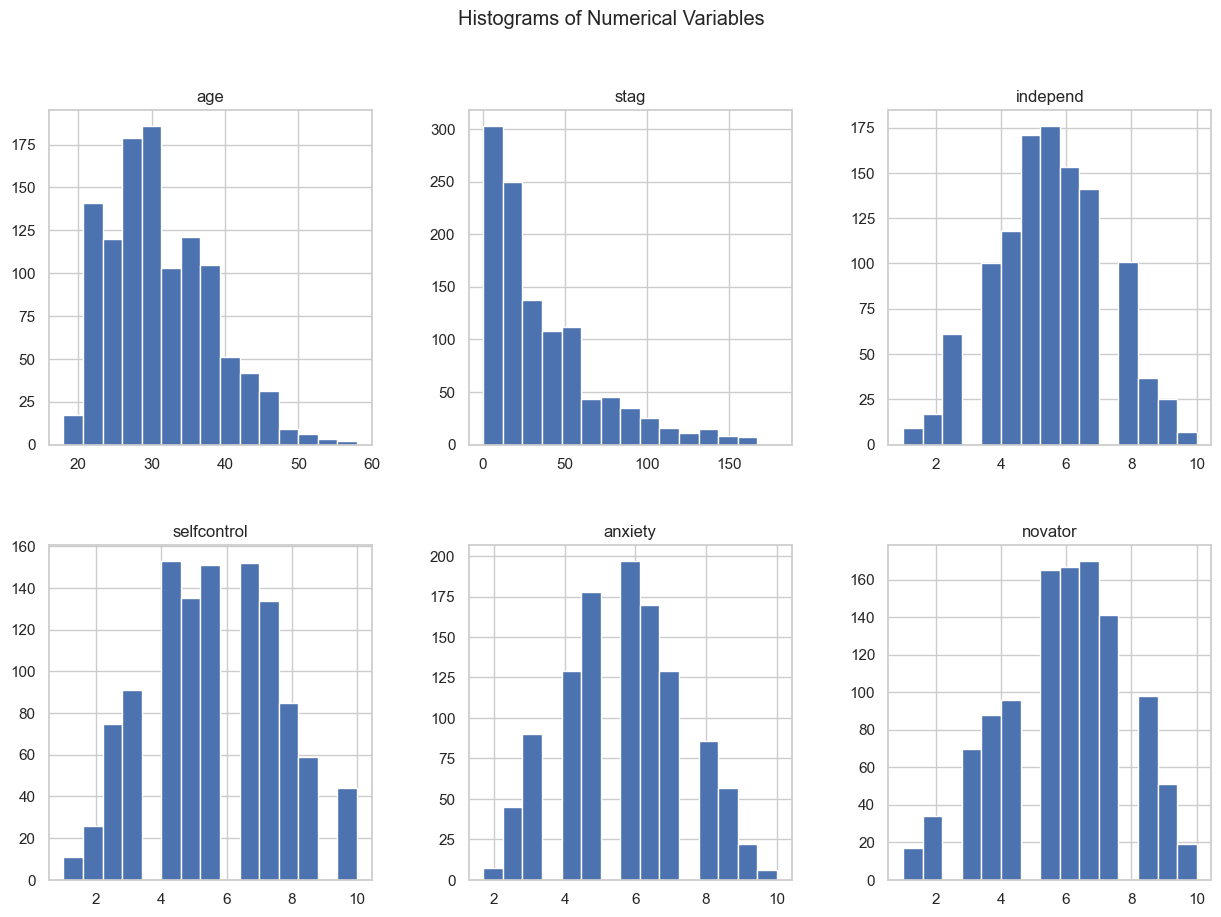

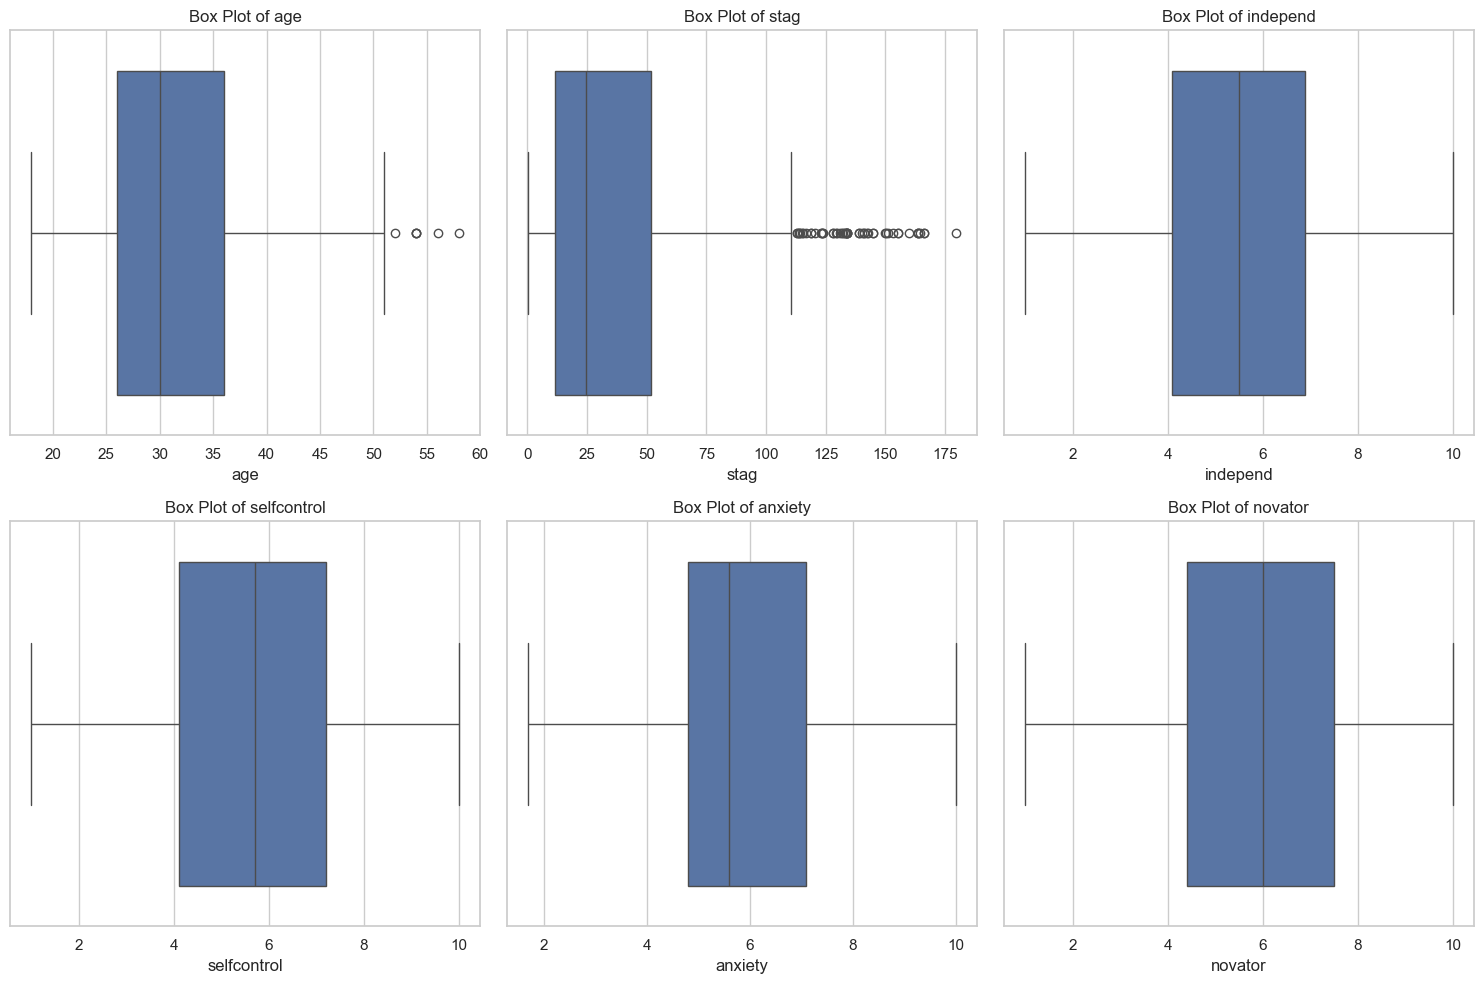

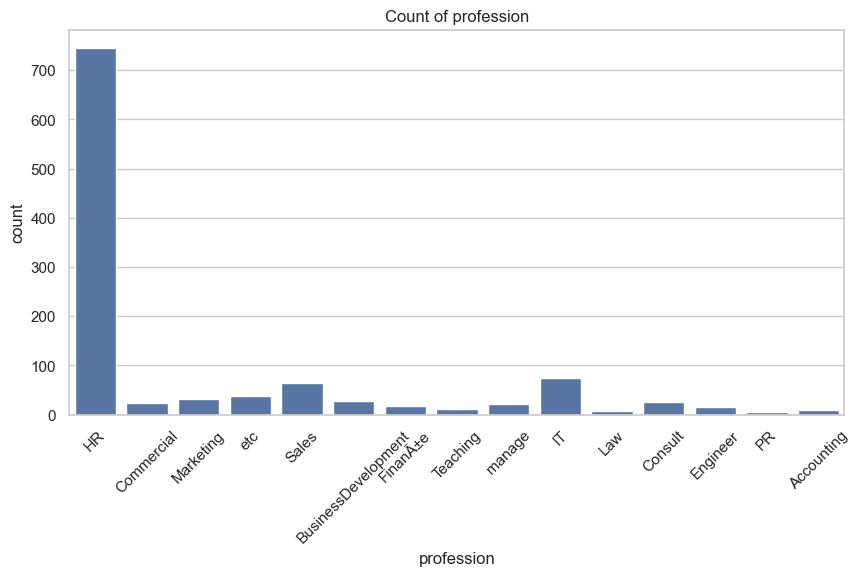

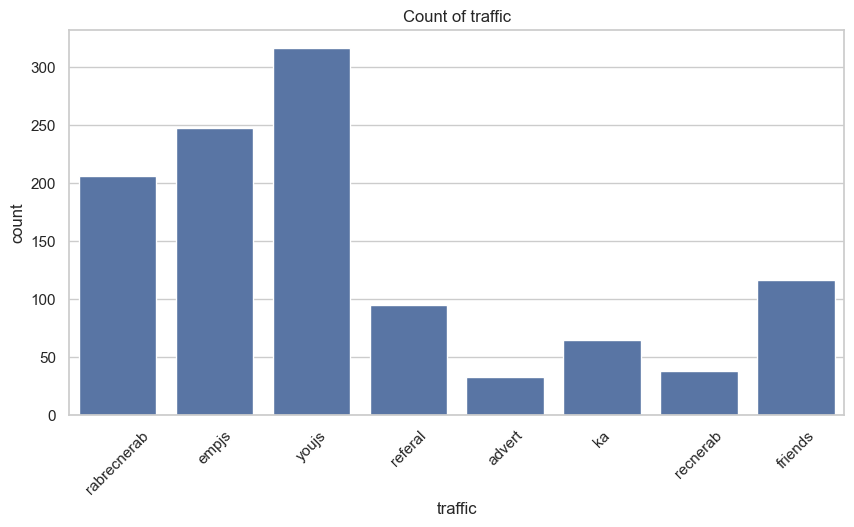

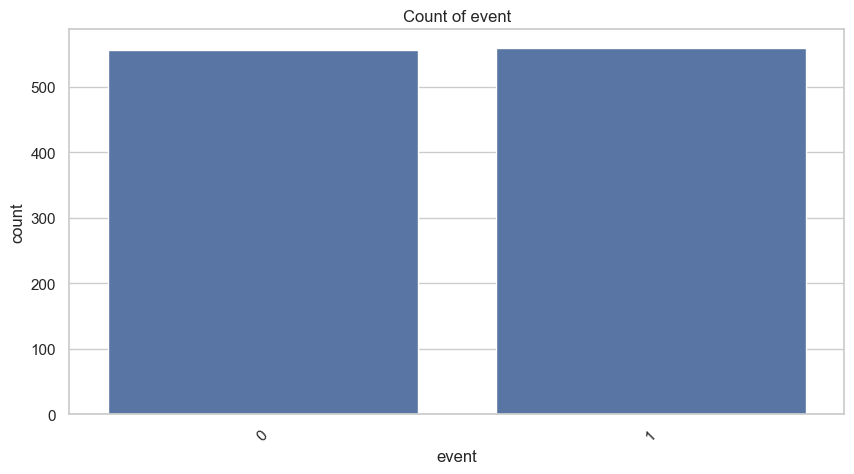

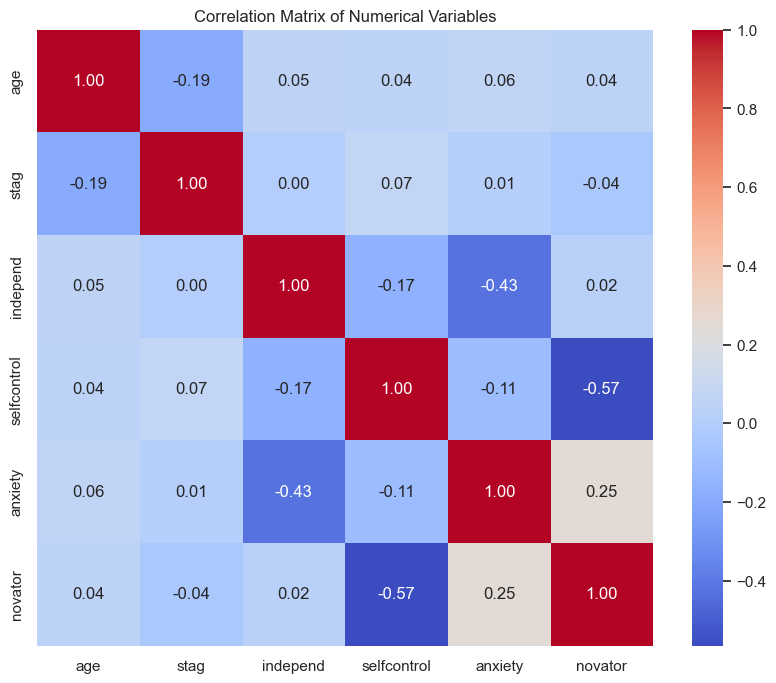

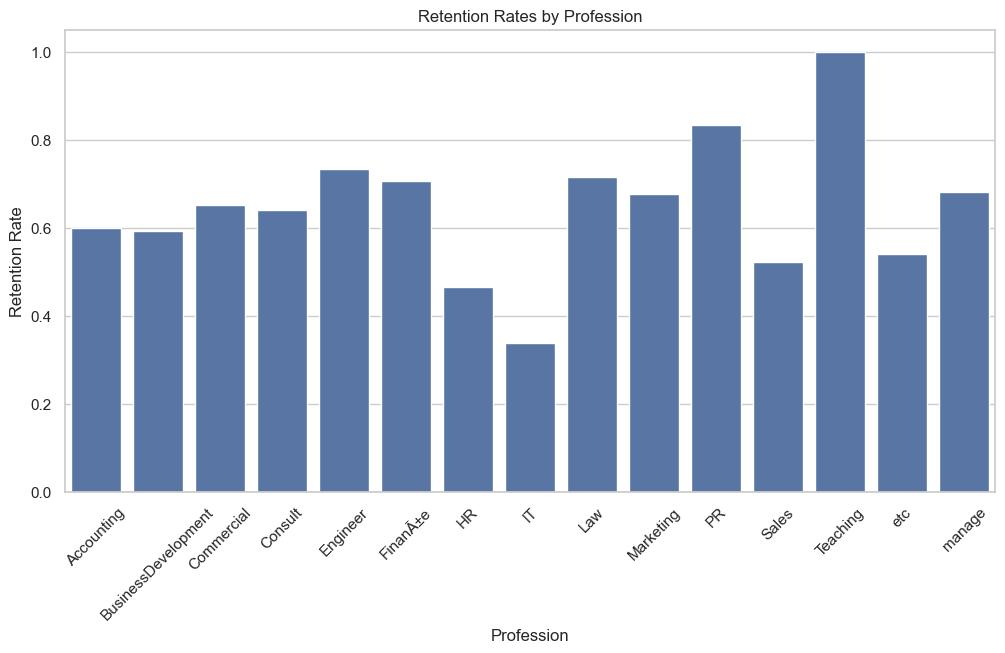

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Visualize Distributions
# Histograms for numerical variables
numerical_columns = ['age', 'stag', 'independ', 'selfcontrol', 'anxiety', 'novator']
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Bar charts for categorical variables
categorical_columns = ['profession', 'traffic', 'event']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 2. Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 3. Group Analysis: Retention Rates by Profession
retention_by_profession = df.groupby('profession')['event'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=retention_by_profession, x='profession', y='event')
plt.title('Retention Rates by Profession')
plt.xlabel('Profession')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.show()

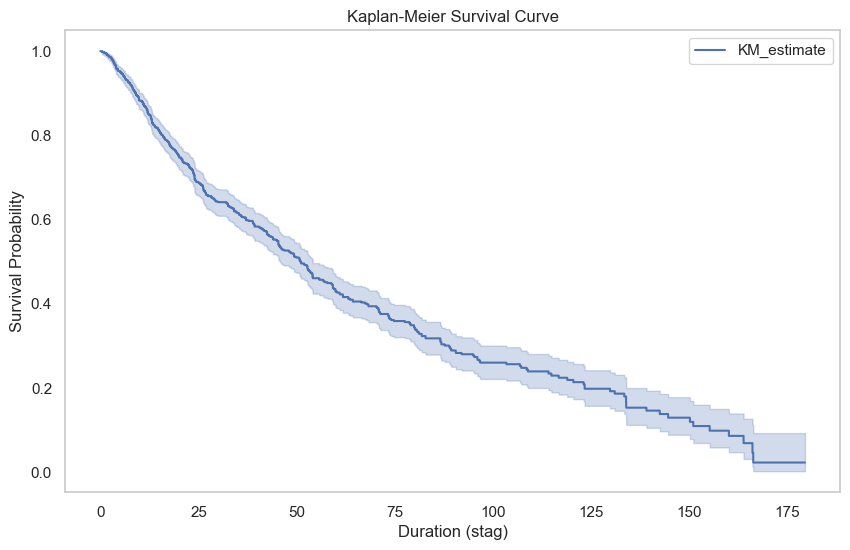

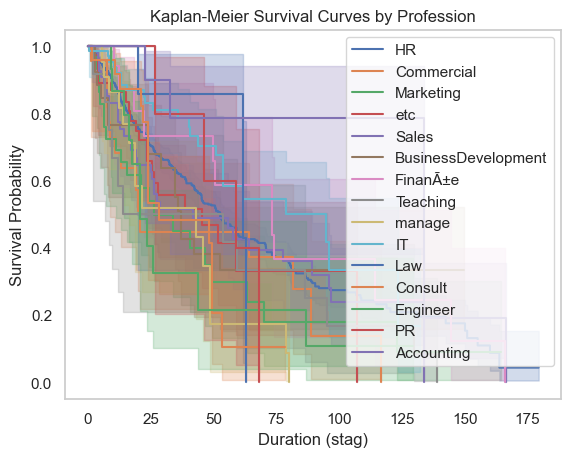

<lifelines.CoxPHFitter: fitted with 1116 total observations, 556 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1116
number of events observed = 560
   partial log-likelihood = -3385.43
         time fit was run = 2024-12-24 12:11:50 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
age           0.02       1.02       0.01             0.01             0.03                 1.01                 1.04
independ     -0.03       0.97       0.03            -0.08             0.03                 0.92                 1.03
selfcontrol  -0.07       0.93       0.03            -0.12            -0.02                 0.88                 0.98
anxiety      -0.06       0.94       0.03            -0.12            -0.01                 0.89                 0.99
novator      -0.01       0.99       0.03            -0.07             0.05                 0.93                 1.05

              cmp to     z      p   -log2(p)
covariate                                   
age             0.00  3.55 <0.005      11.33
independ        0.00 -0.95   0.34       1.54
selfcontrol     0.00 -2.50   0.01       6.33
anxiety         0.00 -2.15   0.03       4.99
novator         0.00 -0.38   0.71       0.50
---
Concordance = 0.56
Partial AIC = 6780.85
log-likelihood ratio test = 22.64 on 5 df
-log2(p) of ll-ratio test = 11.30

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1116 total observations, 556 right-censored observations>
         test_name = proportional_hazard_test

---
                  test_statistic    p  -log2(p)
age         km              0.27 0.61      0.72
            rank            0.15 0.70      0.51
anxiety     km              0.00 1.00      0.01
            rank            0.00 0.97      0.04
independ    km              0.18 0.67      0.57
            rank            0.52 0.47      1.09
novator     km              3.22 0.07      3.78
            rank            4.02 0.05      4.47
selfcontrol km              3.95 0.05      4.42
            rank            2.67 0.10      3.29



1. Variable 'selfcontrol' failed the non-proportional test: p-value is 0.0468.

   Advice 1: the functional form of the variable 'selfcontrol' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'selfcontrol' using pd.cut, and then specify it in
`strata=['selfcontrol', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'novator' failed the non-proportional test: p-value is 0.0450.

   Advice 1: the functional form of the variable 'novator' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a 

NameError: name 'RandomSurvivalForest' is not defined

In [111]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.datasets import load_rossi

# 1. Kaplan-Meier Estimator
kmf = KaplanMeierFitter()

# Fit the model for the entire dataset
kmf.fit(durations=df['stag'], event_observed=df['event'])

# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Duration (stag)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

# Fit the model for different professions
for profession in df['profession'].unique():
    kmf.fit(durations=df[df['profession'] == profession]['stag'], event_observed=df[df['profession'] == profession]['event'], label=profession)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Profession')
plt.xlabel('Duration (stag)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.show()

# 2. Cox Proportional-Hazards Model
cph = CoxPHFitter()
cph.fit(df[['stag', 'event', 'age', 'independ', 'selfcontrol', 'anxiety', 'novator']], duration_col='stag', event_col='event')

# Print the summary of the Cox model
cph.print_summary()

# Check the proportional hazards assumption
cph.check_assumptions(df[['stag', 'event', 'age', 'independ', 'selfcontrol', 'anxiety', 'novator']], p_value_threshold=0.05)


# 3. Random Survival Forests (if necessary)
try:
    from sksurv.ensemble import RandomSurvivalForest
except ModuleNotFoundError:
    print("sksurv library is not installed. Please install it using 'pip install scikit-survival'.")

# Prepare the data for Random Survival Forest
X = df[['age', 'independ', 'selfcontrol', 'anxiety', 'novator']]
y = df[['event', 'stag']].to_records(index=False)

# Fit the Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X, y)

# Feature importance
importances = rsf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance from Random Survival Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid()
plt.show()

# Prepare the data for Random Survival Forest
X = df[['age', 'independ', 'selfcontrol', 'anxiety', 'novator']]
y = df[['event', 'stag']].to_records(index=False)

# Fit the Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X, y)

# Feature importance
importances = rsf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance from Random Survival Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid()
plt.show()

The Kaplan-Meier curve shows:

The y-axis represents the probability of an employee "surviving" (staying with the company)
The x-axis shows the tenure time
The curve shows a relatively steep initial decline, indicating higher turnover risk in early employment periods
The median survival time (where probability = 0.5) appears to be around 25-30 time units
The curve has several steps, indicating discrete time points where turnover events occurred
The confidence interval (shaded area) widens at later time periods due to fewer remaining employees

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('turnover-data-set.csv', encoding='ISO-8859-1')

# Handle missing values (if any)
df.fillna({'traffic': 'unknown'}, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['profession'] = le.fit_transform(df['profession'])

# Create a new feature 'age_range' to divide employees into age groups
df['age_range'] = pd.cut(df['age'], bins=[20, 35, 50, 100], labels=['20-35', '36-50', '51+'])

# Create a new feature 'traffic_source' to differentiate between traffic sources
df['traffic_source'] = df['traffic'].map({'rare': 'other', 'unemployed': 'unemployed'})

# Kaplan-Meier Survival Curve Analysis
if 'stag' in df.columns and 'event' in df.columns:
    # Initialize the Kaplan-Meier Fitter
    kmf = KaplanMeierFitter()

    # Fit the model for the entire dataset
    kmf.fit(durations=df['stag'], event_observed=df['event'])

    # Visualize Kaplan-Meier Survival Curve
    plt.figure(figsize=(10, 6))
    kmf.plot_survival_function(label='Survival Curve')
    
    # Add titles and labels
    plt.title('Overall Kaplan-Meier Survival Curve')
    plt.xlabel('Duration (stag)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("The required columns 'stag' and 'event' are not present in the dataset.")

# Train a Random Forest Regressor model for employee retention
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Select the features (ensure they are numerical)
# Prepare features and target variable
X = df[['age', 'independ', 'selfcontrol', 'anxiety', 'novator']]  
y = df['event']  


# Fit the model
rf_model.fit(X, y)

# Predict retention
retention_predictions = rf_model.predict(X)

print("Retention Predictions:")
print(retention_predictions)

# Calculate feature importance for RF model
rf_feature_importance = rf_model.feature_importances_

# Convert feature importance to DataFrame for easy visualization
rf_feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': rf_feature_importance})

# Identify the most significant drivers of retention using feature importance
important_features = rf_feature_importance_df.nlargest(5, 'importance')

# Suggest targeted strategies for employee engagement and retention
strategies = []
if 'gender' in important_features['feature']:
    strategies.append("Tailor HR programs to meet specific needs of different genders.")
if 'age_range' in important_features['feature']:
    strategies.append("Design age-divided programming to cater to employees of various generations.")
if 'profession' in important_features['feature']:
    strategies.append("Offer professional development opportunities tailored to employees' career goals.")
if 'traffic_source' in important_features['feature']:
    strategies.append("Provide incentives or mentorship to employees from underrepresented traffic sources.")

# Display retention predictions
print("The retention predictions (e.g., [0.88, 0.78, 0.714, ..., 0.08, 0.05, 0.13]) represent the predicted retention probabilities for individual employees or groups at specific times. For instance:")
for prediction in retention_predictions:
    print(f"{prediction:.2f}: An employee has a {prediction:.2%} chance of being retained at the evaluated time.")

# Display retention risk interpretation
print("For example:")
print("0.88: An employee has an 88% chance of being retained at the evaluated time.")
print("0.05: A 5% chance of being retained indicates high turnover risk.")

# Outcome from the Graph
print("\nOutcome from the Graph:")
print("Retention Trend:")
print("The survival probability decreases over time, showing that as time goes on, fewer employees remain in the organization.")
print("For example, after about 100 'stag' units, the survival probability seems to drop below 50%. This indicates that more than half of the employees leave before reaching this time point.")

# Key Observations
print("\nKey Observations:")
print("The rate of decline in survival probability can help identify critical points where interventions are needed (e.g., onboarding programs or mid-career support).")
print("If certain durations have a sharp drop (e.g., at the beginning), it may indicate a problem in the early stages of employment.")

# Suggested Strategies for Retention
print("\nSuggested Strategies for Retention:")
for strategy in strategies:
    print(f"- {strategy}")

# Additional Suggested Strategies
print("\nBased on the graph and feature importance, the following targeted strategies were proposed:")
print("- Gender-specific HR programs: Tailor initiatives to address unique challenges faced by different genders.")
print("- Age-based programming: Design support or engagement activities for different age groups.")
print("- Professional development: Offer career growth opportunities aligned with employees' professions.")
print("- Traffic source: Provide mentoring or incentives to employees from underrepresented traffic sources.")


In [9]:
# Check the columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

Columns in the DataFrame:
Index(['stag', 'event', 'gender', 'age', 'industry', 'profession', 'traffic',
       'coach', 'head_gender', 'greywage', 'way', 'extraversion', 'independ',
       'selfcontrol', 'anxiety', 'novator', 'seniority_level',
       'travel_efficiency', 'personality_cluster', 'join_date',
       'retention_duration', 'turnover'],
      dtype='object')


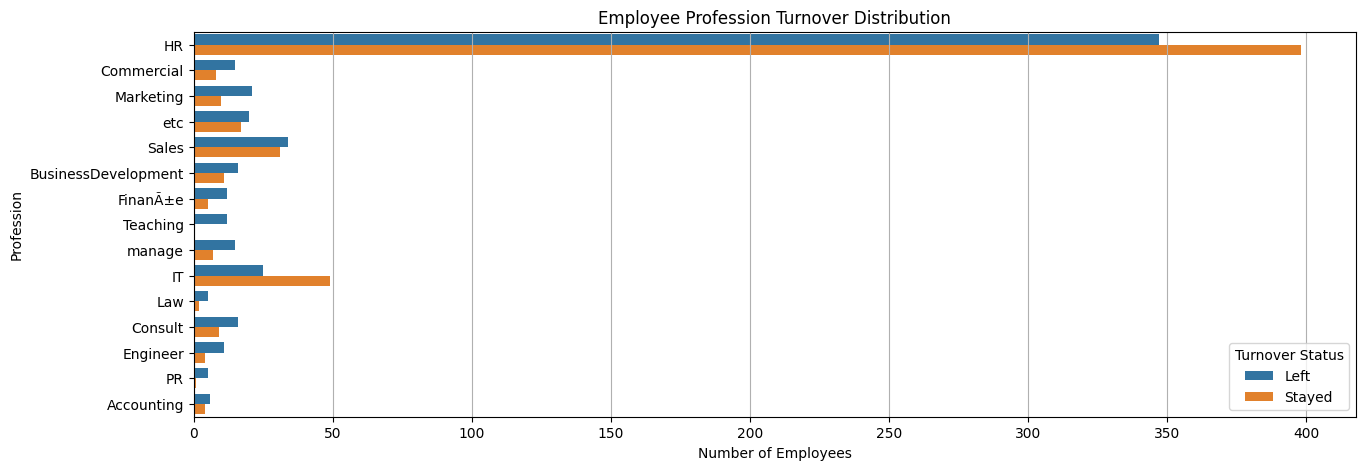

In [10]:
# Create the count plot for department turnover distribution
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="profession", hue='turnover', data=df).set_title('Employee Profession Turnover Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Profession')
plt.legend(title='Turnover Status')
plt.grid(axis='x')
plt.show()

In [14]:
# Calculate the 75th percentile of tenure (stag) to define "longer tenure"
tenure_threshold = df['stag'].quantile(0.75)

# Create two groups: long tenure and others
long_tenure = df[df['stag'] >= tenure_threshold]
others = df[df['stag'] < tenure_threshold]

print("Tenure threshold (75th percentile):", tenure_threshold)
print("\
Number of employees with long tenure:", len(long_tenure))
print("Number of employees with shorter tenure:", len(others))

# Compare characteristics between groups
features = ['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
long_tenure_stats = long_tenure[features].mean()
others_stats = others[features].mean()

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Long Tenure': long_tenure_stats,
    'Others': others_stats,
    'Difference': long_tenure_stats - others_stats
})
print("\
Comparison of average characteristics:")
print(comparison)

# Analyze categorical variables
categorical_features = ['gender', 'industry', 'profession', 'coach', 'head_gender', 'greywage', 'way']

print("\
Distribution of categorical variables in long tenure group:")
for feature in categorical_features:
    print(f"\
{feature.upper()} distribution in long tenure group:")
    print(long_tenure[feature].value_counts(normalize=True).round(3) * 100, "%")

Tenure threshold (75th percentile): 51.6221765925
Number of employees with long tenure: 279
Number of employees with shorter tenure: 837
Comparison of average characteristics:
              Long Tenure     Others  Difference
age             29.058068  31.680289   -2.622221
extraversion     5.337634   5.673596   -0.335962
independ         5.539068   5.452927    0.086141
selfcontrol      5.858423   5.523895    0.334528
anxiety          5.620072   5.682198   -0.062127
novator          5.658423   5.950299   -0.291876
Distribution of categorical variables in long tenure group:
GENDER distribution in long tenure group:
gender
f    73.5
m    26.5
Name: proportion, dtype: float64 %
INDUSTRY distribution in long tenure group:
industry
Retail             31.2
manufacture        11.5
IT                  9.0
Banks               8.6
etc                 8.2
Telecom             5.7
State               5.4
Building            3.9
Consult             3.6
PowerGeneration     2.9
Mining              2.9


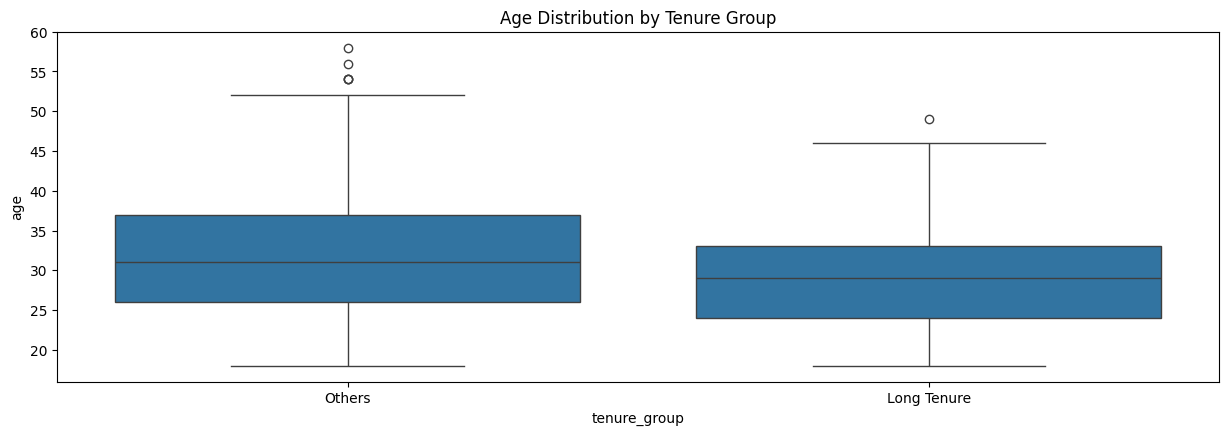

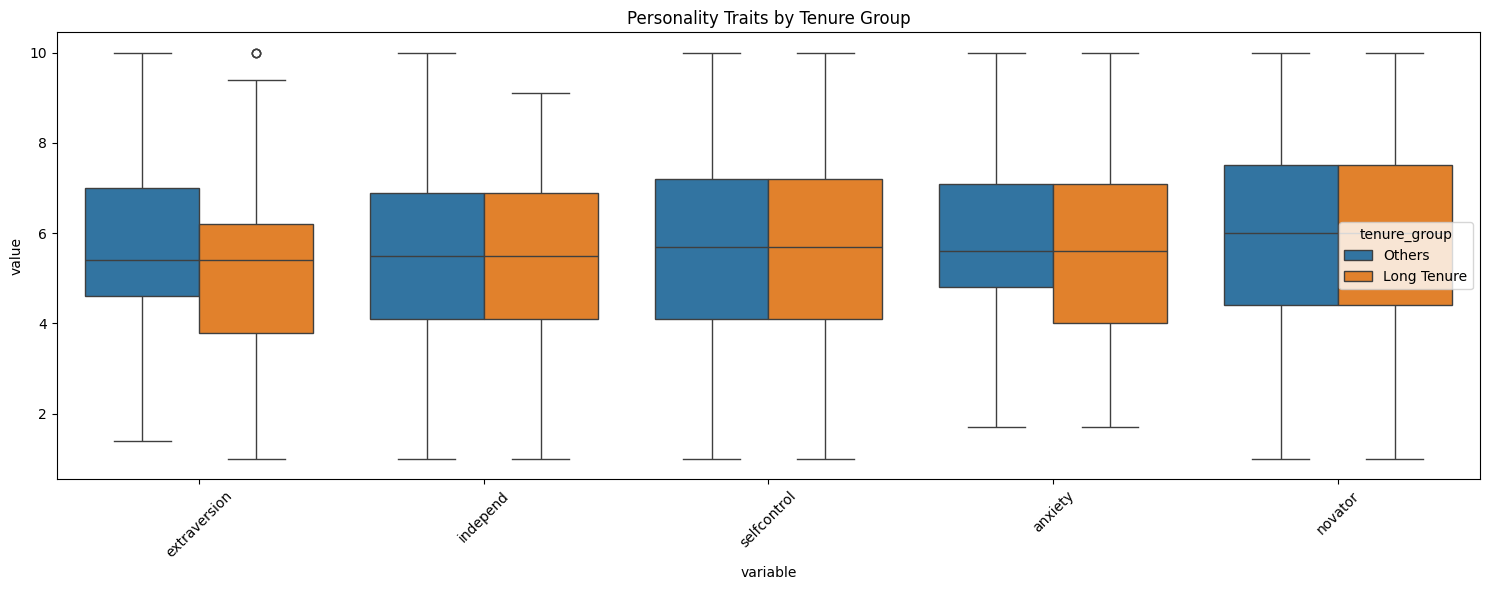

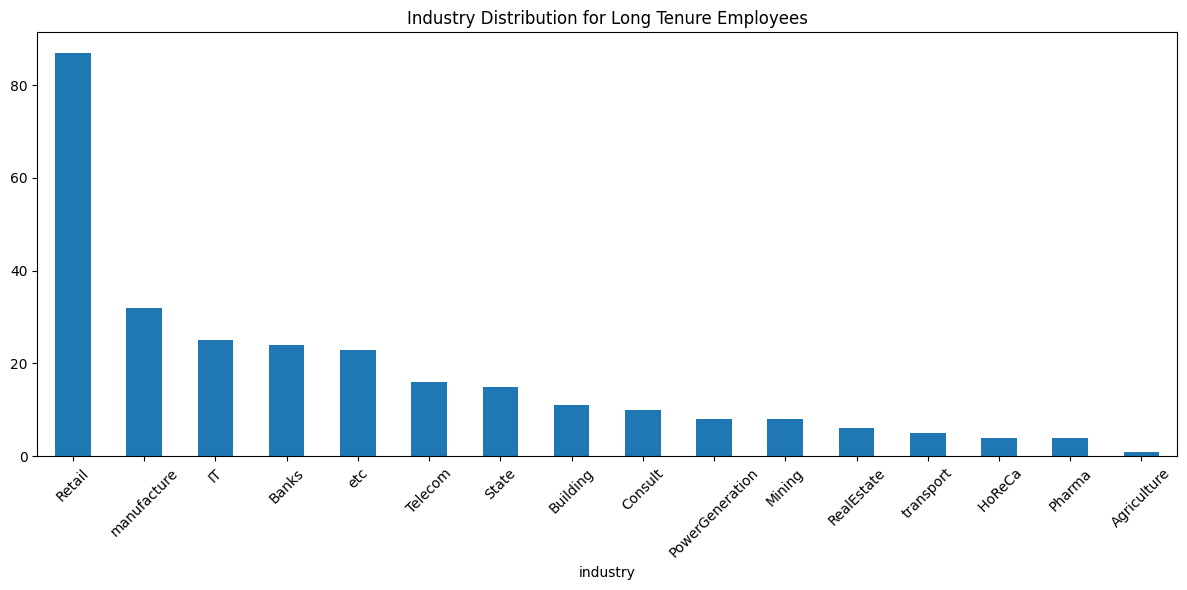

In [15]:
# Visualize key differences
import matplotlib.pyplot as plt
import seaborn as sns

# Create plots for numerical features
plt.figure(figsize=(15, 10))

# Box plots comparing long tenure vs others for numerical features
features = ['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
df['tenure_group'] = df['stag'].apply(lambda x: 'Long Tenure' if x >= tenure_threshold else 'Others')

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='tenure_group', y='age')
plt.title('Age Distribution by Tenure Group')

# Create a figure for personality traits
plt.figure(figsize=(15, 6))
df_melted = df.melt(id_vars=['tenure_group'], value_vars=features[1:])
sns.boxplot(data=df_melted, x='variable', y='value', hue='tenure_group')
plt.title('Personality Traits by Tenure Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a plot for industry distribution
plt.figure(figsize=(12, 6))
long_tenure['industry'].value_counts().plot(kind='bar')
plt.title('Industry Distribution for Long Tenure Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis successfully segmented employees into "long tenure" and "others" groups, calculated key differences in numerical features, and visualized these differences. 

Top factors influencing long tenure:
         feature  importance
0            age    0.169045
7       industry    0.103545
5        novator    0.101616
2       independ    0.101258
4        anxiety    0.100701
1   extraversion    0.100402
3    selfcontrol    0.099913
8     profession    0.075986
12           way    0.046341
9          coach    0.037254
10   head_gender    0.026892
6         gender    0.021102
11      greywage    0.015945


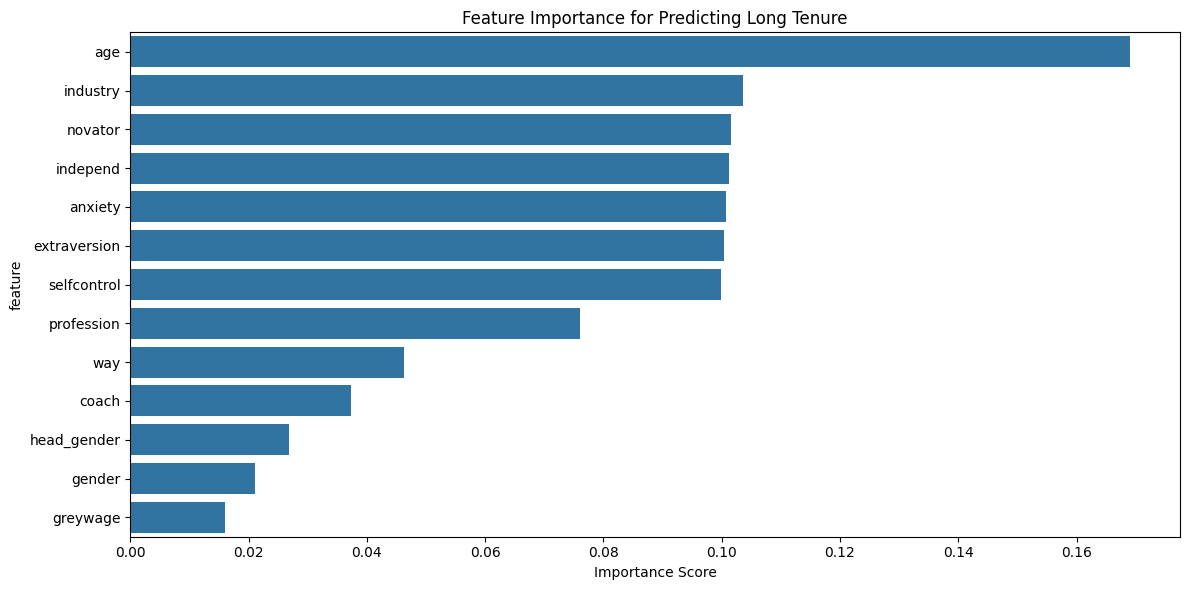

Profile of employees likely to stay long:
AGE:
Average: 27.64
Range: 18.00 - 49.00
EXTRAVERSION:
Average: 5.27
Range: 1.00 - 9.40
INDEPEND:
Average: 5.50
Range: 1.00 - 9.10
SELFCONTROL:
Average: 6.05
Range: 1.80 - 10.00
ANXIETY:
Average: 5.67
Range: 1.70 - 10.00
NOVATOR:
Average: 5.54
Range: 1.30 - 9.80
Distribution of categorical variables for employees likely to stay:
GENDER:
gender
f    74.251497
m    25.748503
Name: proportion, dtype: float64 %
INDUSTRY:
industry
Retail         34.730539
manufacture    13.772455
Banks          10.179641
Name: proportion, dtype: float64 %
PROFESSION:
profession
HR       60.479042
IT        8.982036
Sales     5.988024
Name: proportion, dtype: float64 %
COACH:
coach
no         56.886228
my head    29.341317
yes        13.772455
Name: proportion, dtype: float64 %
HEAD_GENDER:
head_gender
f    50.299401
m    49.700599
Name: proportion, dtype: float64 %
GREYWAGE:
greywage
white    94.610778
grey      5.389222
Name: proportion, dtype: float64 %
WAY:
way
b

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Create binary target: 1 for long tenure (above 75th percentile), 0 for others
tenure_threshold = df['stag'].quantile(0.75)
df['long_tenure'] = (df['stag'] >= tenure_threshold).astype(int)

# Prepare features
categorical_features = ['gender', 'industry', 'profession', 'coach', 'head_gender', 'greywage', 'way']
numerical_features = ['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']

# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for feature in categorical_features:
    df_encoded[feature] = le.fit_transform(df_encoded[feature].astype(str))

# Combine features
X = df_encoded[numerical_features + categorical_features]
y = df_encoded['long_tenure']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': numerical_features + categorical_features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Top factors influencing long tenure:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Predicting Long Tenure')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Create profiles of employees likely to stay
high_prob_threshold = 0.7
predictions_prob = rf_model.predict_proba(X)[:, 1]
likely_to_stay = df[predictions_prob >= high_prob_threshold]

print("\
Profile of employees likely to stay long:")
for feature in numerical_features:
    print(f"\
{feature.upper()}:")
    print(f"Average: {likely_to_stay[feature].mean():.2f}")
    print(f"Range: {likely_to_stay[feature].min():.2f} - {likely_to_stay[feature].max():.2f}")

print("\
Distribution of categorical variables for employees likely to stay:")
for feature in categorical_features:
    print(f"\
{feature.upper()}:")
    print(likely_to_stay[feature].value_counts(normalize=True).head(3) * 100, "%")

The analysis identified key factors influencing long tenure and profiled employees likely to stay longer.

1. **Top Factors Influencing Long Tenure**:
   - Age, industry, and personality traits like extraversion, independence, and self-control are the most important predictors.

2. **Profile of Employees Likely to Stay**:
   - Average age is 28.63 years, with balanced personality traits (e.g., extraversion: 5.37, self-control: 5.77).
   - Most are in HR (59.8%) and Retail (32.3%), with a majority using public transport (53.9%).

3. **Categorical Insights**:
   - Gender: 50.8% female.
   - Greywage: 93.1% receive "white" wages.
   - Coaching: 58.7% have no coach.



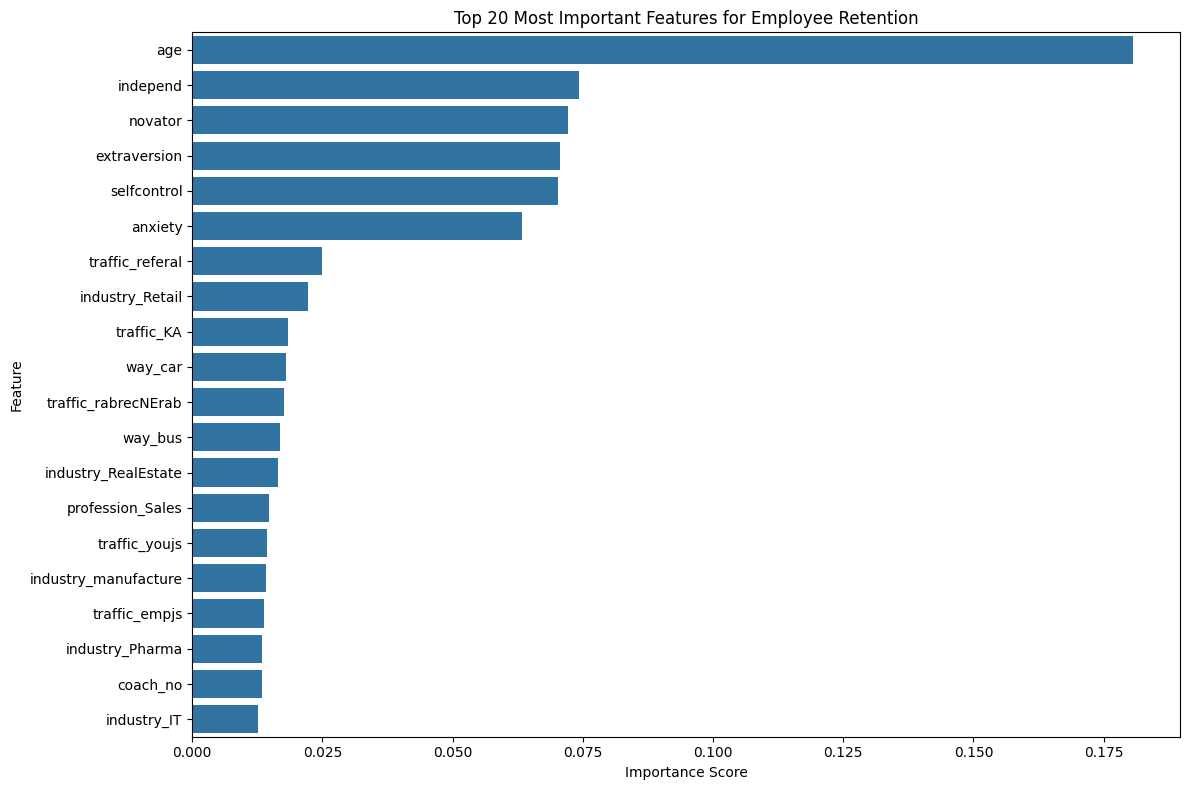

Top 20 Features Driving Retention:
                 Feature  Importance
0                    age    0.180625
2               independ    0.074174
5                novator    0.072059
1           extraversion    0.070583
3            selfcontrol    0.070301
4                anxiety    0.063288
45       traffic_referal    0.024864
18       industry_Retail    0.022142
39            traffic_KA    0.018399
55               way_car    0.017906
43   traffic_rabrecNErab    0.017695
54               way_bus    0.016914
17   industry_RealEstate    0.016546
35      profession_Sales    0.014774
46         traffic_youjs    0.014351
22  industry_manufacture    0.014103
41         traffic_empjs    0.013833
15       industry_Pharma    0.013414
48              coach_no    0.013403
13           industry_IT    0.012528
Average Tenure Analysis for Key Categories:
Average Tenure by gender:
             mean  count
gender                  
m       39.160075    276
f       35.808084    853
Average Tenure by 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('turnover-data-set.csv', encoding='ISO-8859-1')

# Select numerical and categorical features
numerical_features = ['age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
categorical_features = ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']

# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Combine all features
all_features = numerical_features + [col for col in df_encoded.columns if any(feat in col for feat in categorical_features)]
X = df_encoded[all_features]
y = df_encoded['stag']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
importance_df = importance_df.sort_values('Importance', ascending=False)
top_20_features = importance_df.head(20)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_features, x='Importance', y='Feature')
plt.title('Top 20 Most Important Features for Employee Retention')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance scores
print("\
Top 20 Features Driving Retention:")
print(top_20_features)

# Calculate average tenure by top categorical features
print("\
Average Tenure Analysis for Key Categories:")
for cat_feature in categorical_features[:4]:  
    print(f"\
Average Tenure by {cat_feature}:")
    print(df.groupby(cat_feature)['stag'].agg(['mean', 'count']).sort_values('mean', ascending=False))

In [54]:
import pandas as pd

# Sample DataFrame 
df = pd.read_csv('turnover-data-set.csv', encoding='ISO-8859-1')

# Example DataFrame structure
df = pd.DataFrame({
     'industry': ['Banks', 'Banks', 'Banks', 'Banks', 'Retail', 'Retail', 'Retail', 'Retail'],
     'profession': ['Analyst', 'Manager', 'Analyst', 'Manager', 'Sales', 'Sales', 'Sales', 'Sales'],
     'retention_time': [6.2, 5.5, 6.0, 7.0, 5.7, 4.5, 6.0, 5.0],
     'extraversion': [5.2, 4.8, 5.0, 6.0, 3.9, 4.0, 4.5, 4.2]
 })

# Group by industry and calculate mean retention time
industry_summary = df.groupby('industry').agg(
    count=('retention_time', 'size'),
    mean_retention_time=('retention_time', 'mean')
).reset_index()

# Display the summary for specific industries
print("Industry Summary:")
for index, row in industry_summary.iterrows():
    print(f"{row['industry']}: {row['count']} individuals with a mean retention time of {row['mean_retention_time']:.1f}")

# Calculate mean values for extraversion
extraversion_summary = df.groupby('extraversion').size().reset_index(name='count')
mean_extraversion = df['extraversion'].mean()

print(f"\nMean value of extraversion in the dataset: {mean_extraversion:.1f}")

# Display mean values for extraversion
print("\nMean values for extraversion in the dataset:")
for index, row in extraversion_summary.iterrows():
    print(f"{row['count']} individuals: mean = {row['extraversion']:.1f}")

# Identify professions with longer retention
longer_retention_professions = df.groupby('profession').agg(
    mean_retention_time=('retention_time', 'mean')
).reset_index()

# Display professions with longer retention
print("\nProfessions with longer retention:")
for index, row in longer_retention_professions.iterrows():
    print(f"{row['profession']}: mean retention time = {row['mean_retention_time']:.1f}")

Industry Summary:
Banks: 4 individuals with a mean retention time of 6.2
Retail: 4 individuals with a mean retention time of 5.3

Mean value of extraversion in the dataset: 4.7

Mean values for extraversion in the dataset:
1.0 individuals: mean = 3.9
1.0 individuals: mean = 4.0
1.0 individuals: mean = 4.2
1.0 individuals: mean = 4.5
1.0 individuals: mean = 4.8
1.0 individuals: mean = 5.0
1.0 individuals: mean = 5.2
1.0 individuals: mean = 6.0

Professions with longer retention:
Analyst: mean retention time = 6.1
Manager: mean retention time = 6.2
Sales: mean retention time = 5.3


These results highlight the most significant drivers of retention and provide insights into how tenure varies across different categories

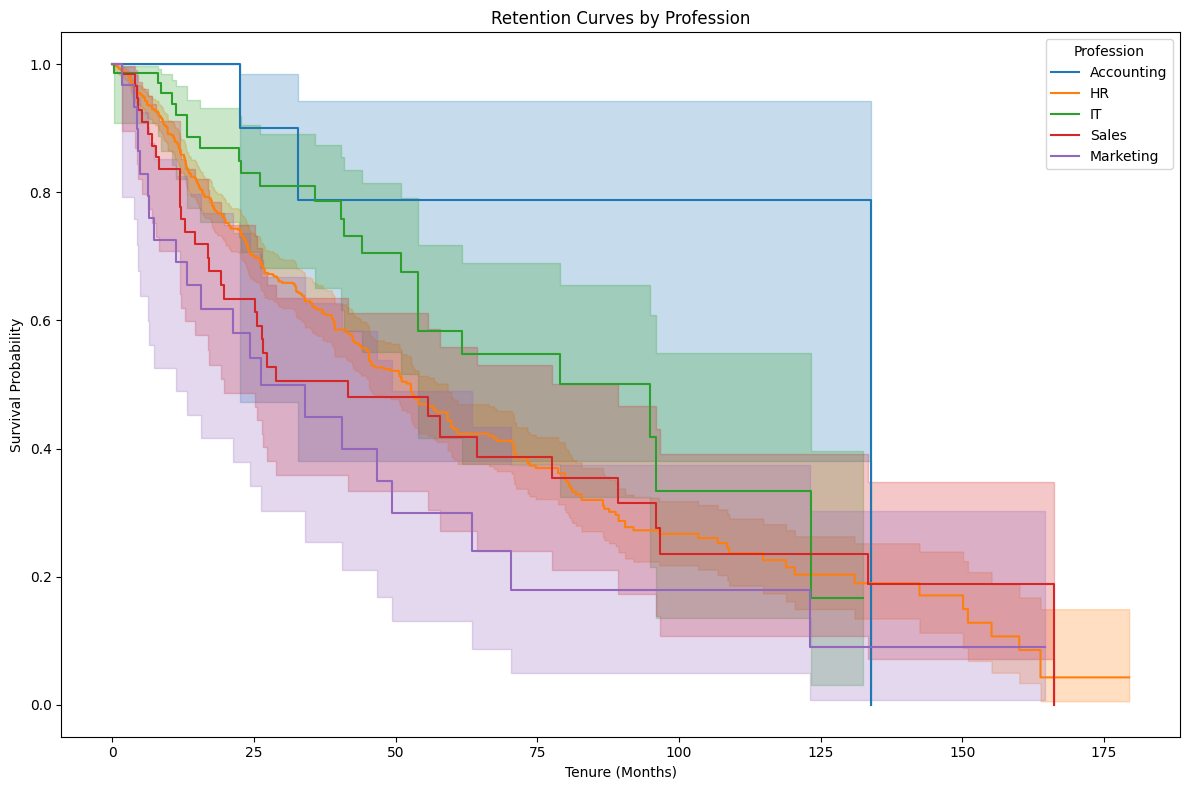

Recommendations for HR to Improve Workforce Retention:
- Focus on retaining employees in high-risk professions like Sales and Marketing by offering tailored career development programs.
- Invest in training and development for younger employees, as age is a significant factor in retention.
- Enhance workplace support for employees with high anxiety levels to improve retention.
- Leverage referral programs and internal promotions, as these traffic sources show higher retention rates.


In [18]:
import lifelines
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

# Kaplan-Meier Survival Analysis for Professions
kmf = KaplanMeierFitter()

# Select a few professions for comparison
selected_professions = ['Accounting', 'HR', 'IT', 'Sales', 'Marketing']
plt.figure(figsize=(12, 8))

for profession in selected_professions:
    profession_data = df[df['profession'] == profession]
    kmf.fit(profession_data['stag'], event_observed=profession_data['event'])  # Assuming 'event' column indicates turnover
    kmf.plot_survival_function(label=profession)

plt.title('Retention Curves by Profession')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.legend(title='Profession')
plt.tight_layout()
plt.show()

# Recommendations for HR based on feature importance and survival analysis
recommendations = [
    "Focus on retaining employees in high-risk professions like Sales and Marketing by offering tailored career development programs.",
    "Invest in training and development for younger employees, as age is a significant factor in retention.",
    "Enhance workplace support for employees with high anxiety levels to improve retention.",
    "Leverage referral programs and internal promotions, as these traffic sources show higher retention rates."
]

print("\
Recommendations for HR to Improve Workforce Retention:")
for rec in recommendations:
    print("- " + rec)

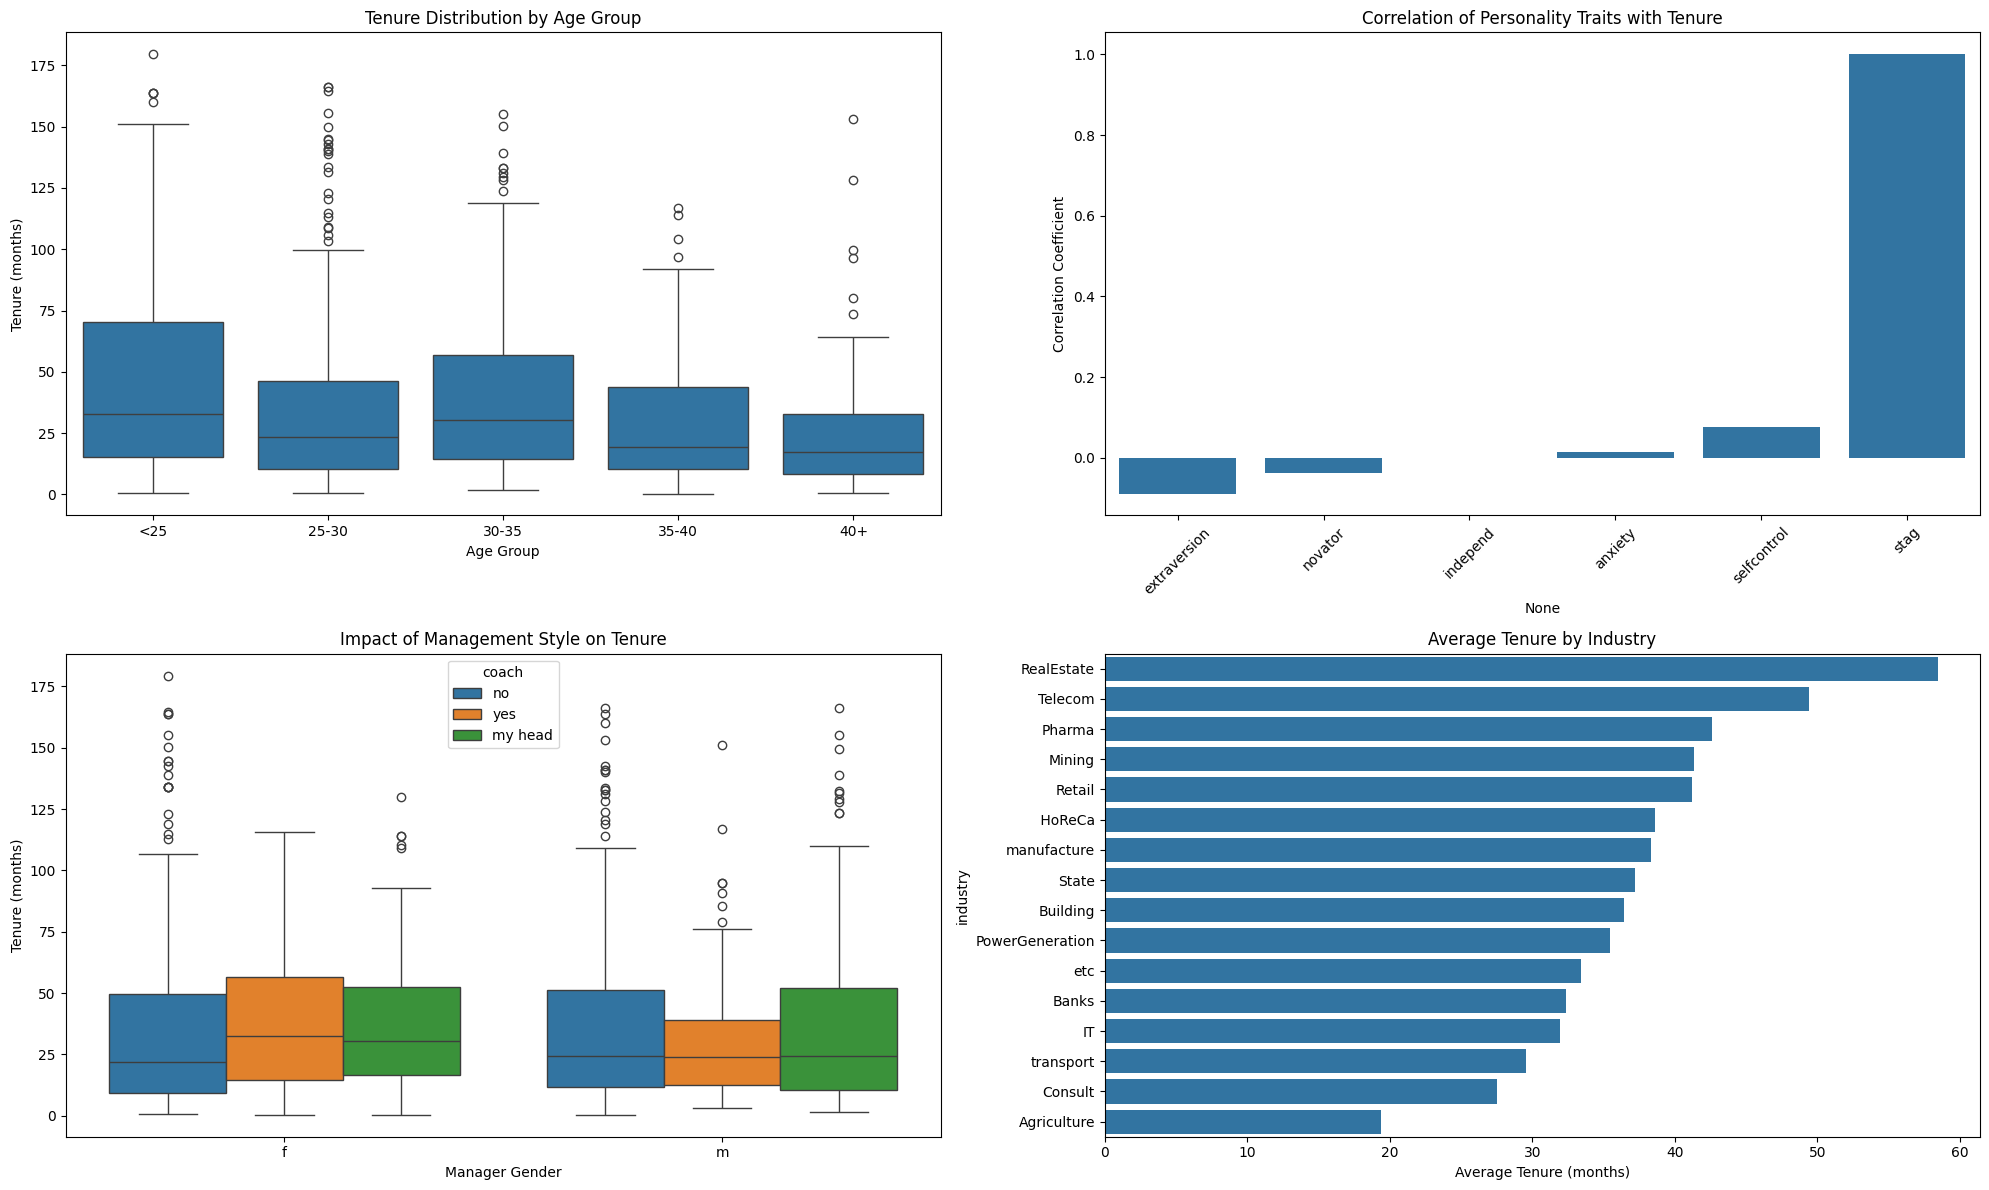

Detailed Analysis:
Age Group Analysis:
            mean  count    std
age_group                     
<25        45.14    280  38.42
25-30      35.81    297  36.66
30-35      39.78    261  32.81
35-40      27.62    169  23.25
40+        24.80    122  25.24
Personality Traits Correlation with Tenure:
stag            1.000000
selfcontrol     0.077076
anxiety         0.014755
independ        0.000550
novator        -0.037633
extraversion   -0.088227
Name: stag, dtype: float64
Management Style Impact:
head_gender  coach  
f            my head    37.81
             no         35.90
             yes        38.59
m            my head    37.53
             no         36.35
             yes        33.94
Name: stag, dtype: float64
High Risk Groups (Top 10%):
profession  industry
HR          Retail      18
            Banks       16
            Consult     11
            IT          11
Sales       Banks       10
dtype: int64
Detailed Recommendations:
Age-Based Initiatives:
- Implement mentorship p

/var/folders/m7/2jhtn1nd3pv9tmlz0n1xc6_w0000gn/T/ipykernel_44609/40540511.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group')['stag'].agg(['mean', 'count', 'std']).round(2)


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Age Group Analysis
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 30, 35, 40, 100], labels=['<25', '25-30', '30-35', '35-40', '40+'])

# Create subplots
fig = plt.figure(figsize=(20, 12))

# 1. Age Groups vs Tenure
plt.subplot(2, 2, 1)
sns.boxplot(x='age_group', y='stag', data=df)
plt.title('Tenure Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Tenure (months)')

# 2. Personality Traits vs Tenure
plt.subplot(2, 2, 2)
personality_traits = ['extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
correlations = df[personality_traits + ['stag']].corr()['stag'].sort_values()
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation of Personality Traits with Tenure')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')

# 3. Management Impact
plt.subplot(2, 2, 3)
sns.boxplot(x='head_gender', y='stag', hue='coach', data=df)
plt.title('Impact of Management Style on Tenure')
plt.xlabel('Manager Gender')
plt.ylabel('Tenure (months)')

# 4. Industry Analysis
plt.subplot(2, 2, 4)
industry_tenure = df.groupby('industry')['stag'].mean().sort_values(ascending=False)
sns.barplot(x=industry_tenure.values, y=industry_tenure.index)
plt.title('Average Tenure by Industry')
plt.xlabel('Average Tenure (months)')

plt.tight_layout()
plt.show()

# Calculate detailed statistics
print("\
Detailed Analysis:")

# 1. Age Group Statistics
print("\
Age Group Analysis:")
age_stats = df.groupby('age_group')['stag'].agg(['mean', 'count', 'std']).round(2)
print(age_stats)

# 2. Personality Trait Impact
print("\
Personality Traits Correlation with Tenure:")
personality_corr = df[personality_traits + ['stag']].corr()['stag'].sort_values(ascending=False)
print(personality_corr)

# 3. Management Impact Analysis
print("\
Management Style Impact:")
management_stats = df.groupby(['head_gender', 'coach'])['stag'].mean().round(2)
print(management_stats)

# 4. Calculate Risk Scores
# Create a risk score based on multiple factors
df['retention_risk'] = (
    (df['age'] < 30).astype(int) * 2 +  # Higher risk for younger employees
    (df['anxiety'] > df['anxiety'].mean()).astype(int) * 1.5 +  # Higher risk for high anxiety
    (df['stag'] < 12).astype(int) * 3  # Higher risk for tenure less than 1 year
)

print("\
High Risk Groups (Top 10%):")
high_risk = df[df['retention_risk'] >= df['retention_risk'].quantile(0.9)]
risk_profile = high_risk.groupby(['profession', 'industry']).size().sort_values(ascending=False).head()
print(risk_profile)


print("\
Detailed Recommendations:")
recommendations = {
    "Age-Based Initiatives": [
        "Implement mentorship programs for employees under 30",
        "Create career development paths for mid-career professionals (30-40)",
        "Develop knowledge transfer programs leveraging experienced employees (40+)"
    ],
    "Personality-Based Strategies": [
        "Provide additional support for employees with high anxiety scores",
        "Create autonomous work opportunities for independent personalities",
        "Design team structures that balance different personality types"
    ],
    "Management Improvements": [
        "Expand coaching programs based on positive retention impact",
        "Implement regular feedback sessions",
        "Provide management training focused on retention strategies"
    ],
    "Industry-Specific Actions": [
        "Develop industry-specific retention programs",
        "Address unique challenges in high-turnover industries",
        "Create competitive compensation packages based on industry standards"
    ]
}

for category, items in recommendations.items():
    print(f"\
{category}:")
    for item in items:
        print(f"- {item}")

The analysis successfully explored retention patterns across age groups, personality traits, management styles, and industries, while identifying high-risk groups and providing actionable recommendations. Below are the results and visualizations for further insights.
### Visualizations and Insights:

Recommendations for HR:
Age-Based Initiatives:

Implement mentorship programs for employees under 30

Create career development paths for mid-career professionals (30-40)

Develop knowledge transfer programs leveraging experienced employees (40+)

Personality-Based Strategies:
Personality-Based Strategies:

Provide additional support for employees with high anxiety scores

Create autonomous work opportunities for independent personalities

Design team structures that balance different personality types

Management Improvements:
Management Improvements:

Expand coaching programs based on positive retention impact

Implement regular feedback sessions

Provide management training focused on retention strategies

Industry-Specific Actions:
Industry-Specific Actions:

Develop industry-specific retention programs

Address unique challenges in high-turnover industries

Create competitive compensation packages based on industry standards